In [1]:
##################################################
## ============Summary=========================
## Course: SEIS631-2 Data Preparation and Analysis 
## Title: Car Analysis
## Purpose: You are to create a data analysis report on the following dataset and submit as a group assignment.  Find numeric variables in Car Details Dataset | KaggleLinks to an external site. Data sets and explore and summarize them.
## Date: 2024-04-01
## Author 01: Beyene, Biki
## Author 02: Knutsen, Erik
## Author 03: Tchamande, Serge Yvon N
## Author 04: Uchegbu, Kelechi N.
## Author 05: Vernekar, Saloni Satish 
## ==========Process Steps=====================
##
## SECTION 01: File Load
##
## Step 01: Import packages
## Step 02: Data load
## Step 03: Initial Observation - head
## Step 04: Initial Observation - describe
## Step 05: Data cleansing - derive fields
## Step 06: Data cleansing - flag fields
## Step 07: Data cleansing - Filter working dataset
## Step 08: Data cleansing - Create derived fields from cleaned datasets
## Step 09: Data cleansing - Build rank function and category of "All Others" if not in top N.
##
## SECTION 02: Center & Spread Measurements
##
## Step 10: Miles Driven - Center & Spread - Text Output
## Step 11: Miles Driven - Center & Spread - Box Plot
## Step 12: Miles Driven - Center & Spread & Skew - Histogram
## Step 13: Selling Price USD - Center & Spread - Text Output
## Step 14: Selling Price USD - Center & Spread - Box Plot
## Step 15: Selling Price USD - Center & Spread & Skew - Histogram
##
## SECTION 03: Insights Section 01
##
## Step 16: Total Cars Sold by Make - Count
## Step 17: Total Cars Sold by Make - Total Value
## Step 18: Total Cars Sold by Make - Tree Map
## Step 18b: Total Cars Sold by Year - Tree Map (All Others Category)
## Step 18c: Total Cars Sold by Year - Tree Map (Median)
## Step 19: Total Cars Sold by Year 
## Step 20: Box Plot by Selling Price by Make
## Step 21: Box Plot by Selling Price by Year
## Step 22: Scatter Plot of Selling Price and Units Sold
## Step 23: Hexbin Plot by Selling Price and Units Sold
## Step 24: 3D Scatter Plot of Year, Selling Price, and Miles Driven
## Step 25: Most Expensive and Least Expensive Cars
## Step 26: Distribution of Used Fuels
## Step 27: Distribution of Seller Types
## Step 28: Distribution of Transmission
## Step 29: Distribution of cars sold by transmission type over the years
## Step 30: Distribution of Owner
## Step 31: Clustering of Miles Driven by Owner
## Step 32: Pairplot of Year, Selling Price & Miles Driven

## ==================Resources================================
## https://www.kaggle.com/datasets/akshaydattatraykhare/car-details-dataset
## https://www.kaggle.com/code/melikedilekci/eda-car-data-analysis
## https://www.practicalpythonfordatascience.com/ap_seaborn_palette #Seaborn Pallette
## https://matplotlib.org/stable/gallery/color/named_colors.html #Seaborn Colors
##################################################

In [2]:
#########################################
###
##### Section 01: File Load
###
### #####################################

In [3]:
########################################
### Section 01: file Load
### Step 01: Import Packages
########################################
# pip install pandas==2.2.2

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter #Needed for: StrMethodFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [4]:
########################################
### Section 01: file Load
### Step 02: Data Load
########################################

#path = '/Users/kelechi/Development/JupyterNotebooks/'
#path = 'C:/Users/erikk/OneDrive/Documents/ERIK_UST/seis631/project_02_car_analysis/01_prod/data_files/input/'

#os.chdir(path)
#Ingest data
file = 'CAR DETAILS FROM CAR DEKHO.csv'
data = pd.read_csv(file, encoding='latin-1')

In [5]:
########################################
### Section 01: file Load
### Step 03: Initial Observation - head
########################################

#Inspection of the data.
data.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [6]:
########################################
### Section 01: file Load
### Step 04: Initial Observation - describe
########################################

#Validation of measurements
data.describe().transpose()

count           mean            std      min        25%  \
year           4340.0    2013.090783       4.215344   1992.0    2011.00   
selling_price  4340.0  504127.311751  578548.736139  20000.0  208749.75   
km_driven      4340.0   66215.777419   46644.102194      1.0   35000.00   

                    50%       75%        max  
year             2014.0    2016.0     2020.0  
selling_price  350000.0  600000.0  8900000.0  
km_driven       60000.0   90000.0   806599.0

In [7]:
########################################
### Section 01: file Load
### Step 05: Data cleansing - derive fields
########################################

data["make"] = data.name.apply(lambda x : ' '.join(x.split(' ')[:1])) #Return everything up to the first word after the first space.
data["model"] = data.name.apply(lambda x : ' '.join(x.split(' ')[1:])) #Return everything after the first word after the first space.
data["miles_driven"] = data.km_driven.apply(lambda x: x * 0.621371 if isinstance(x, (int,float)) else None) #convert unit to miles
data["selling_price_usd"] = data.selling_price.apply(lambda x : x * 0.012 if isinstance(x, (int,float)) else None) #04/07/2024 Indian Rupee to US Dollar Exchange Rate is 83.30 to 1.
data["order_owner"] = data.owner.apply(lambda x: 1 if x == 'Test Drive Car' else (2 if x == 'First Owner' else (3 if x == 'Second Owner' else (4 if x == 'Third Owner' else (5 if x ==  'Fourth & Above Owner' else '')))))

In [8]:
########################################
### Section 01: file Load
### Step 06: Data cleansing - flag fields
########################################

data['flag_fuel'] = data['fuel'].notna()
data['flag_miles_driven'] = (data['miles_driven'].notna()) 
data['flag_make'] = data['make'].notna()
data['flag_model'] = data['model'].notna()
data['flag_seller_type'] = data['seller_type'].notna()
data['flag_selling_price'] = (data['selling_price'].notna()) & (data['selling_price'] != 0)
data['flag_transmission'] = data['transmission'].notna()
data['flag_year'] = data['year'].notna()

In [9]:
########################################
### Section 01: file Load
### Step 07: Data cleansing - Filter working dataset
########################################

data2 = data[(data['flag_fuel'] == True)]
data2 = data[(data['flag_miles_driven'] == True)]
data2 = data[(data['flag_make'] == True)]
data2 = data[(data['flag_model'] == True)]
data2 = data[(data['flag_seller_type'] == True)]
data2 = data[(data['flag_selling_price'] == True)]
data2 = data[(data['flag_transmission'] == True)]
data2 = data[(data['flag_year'] == True)]

In [10]:
########################################
### Section 01: file Load
### Step 08: Data cleansing - Create derived fields from cleaned datasets
########################################

data_make = data2['make'].value_counts() #count cars sold by make
data_make2 = data_make.to_frame() #convert series to frame

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
data_make2.rename(columns={'count':'total_sold'},inplace=True) #convert value counts to aggregate column name
data_make2 = data_make2.reset_index() #create numerical index     
data_make2.rename(columns={'index': 'make'},inplace=True) #convert value counts to aggregate column name


In [11]:
########################################
### Section 01: file Load
### Step 09: Data cleansing - Build rank function and category of "All Others" if not in top N.
########################################

data_make2['total_sold_rank_desc'] = data_make2['total_sold'].rank(method = 'min', ascending = False)
data_make2['make_top_n'] = data_make2.apply(lambda x: x['make'] if x['total_sold_rank_desc'] <= 10 else "All Others",axis = 1)
data_make2['make_min_n'] = data_make2.apply(lambda x: x['make'] if x['total_sold_rank_desc'] >= 30 else "All Others",axis = 1)
data3 = data2.merge(data_make2, on = ['make'], how='inner')
data2 = data3


In [12]:
#########################################
###
##### Section 02: Center & Spread Measurements
###
### #####################################

In [13]:
########################################
### Section 02: Center & Spread Measurements
### Step 10: Miles Driven - Center & Spread - Text Output
########################################
 
stat_var_01 = 'miles_driven'
var_format = '{:,.2f}'
var_format_2 = '{:,.0f}'
 
print('Measures of center for ' + str(stat_var_01) + ':\n')
 
#mean
stat_var_01_mean = data2[stat_var_01].mean()
stat_var_01_mean_formatted = var_format.format(stat_var_01_mean)                          
print('mean: ' +  str(stat_var_01_mean_formatted))
 
#median
stat_var_01_median = data2[stat_var_01].median()
stat_var_01_median_formatted = var_format.format(stat_var_01_median)                          
print('median: ' +  str(stat_var_01_median_formatted))
 
#mode
stat_var_01_mode = data2[stat_var_01].mode()
stat_var_01_mode_first = stat_var_01_mode.iloc[0] #iloc returns the first value, in case there are multiple mode results
stat_var_01_mode_formatted = var_format.format(stat_var_01_mode_first)  
stat_var_01_mode_count = data2[stat_var_01].value_counts()[stat_var_01_mode_first]
print('mode: ' +  str(stat_var_01_mode_formatted))
print('mode count: ' +  str(stat_var_01_mode_count))
 
print('\nMeasures of spread for ' + str(stat_var_01) + ':\n')
 
#min
stat_var_01_min = data2[stat_var_01].min()
stat_var_01_min_formatted = var_format.format(stat_var_01_min)                          
print('min: ' +  str(stat_var_01_min_formatted))
 
#max
stat_var_01_max = data2[stat_var_01].max()
stat_var_01_max_formatted = var_format.format(stat_var_01_max)                          
print('max: ' +  str(stat_var_01_max_formatted))
 
#standard deviation
stat_var_01_std_dev = data2[stat_var_01].std()
stat_var_01_std_dev_formatted = var_format.format(stat_var_01_std_dev)
stat_var_01_std_dev_plus_01 = var_format.format(stat_var_01_mean + stat_var_01_std_dev)
stat_var_01_std_dev_minus_01 = var_format.format(stat_var_01_mean - stat_var_01_std_dev)
print('standard deviation: ' +  str(stat_var_01_std_dev_formatted))
print('standard deviation plus 1: ' +  str(stat_var_01_std_dev_plus_01))
print('standard deviation minus 1: ' +  str(stat_var_01_std_dev_minus_01))
 
#variance
stat_var_01_var = data2[stat_var_01].var()
stat_var_01_var_formatted = var_format.format(stat_var_01_var)                          
print('variance: ' +  str(stat_var_01_var_formatted))
 
#quantile
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.quantile.html
stat_var_01_quant_25 = data2[stat_var_01].quantile(.25)
stat_var_01_quant_25_formatted = var_format.format(stat_var_01_quant_25)                          
print('1st quartile: ' +  str(stat_var_01_quant_25_formatted))

stat_var_01_quant_75 = data2[stat_var_01].quantile(.75)
stat_var_01_quant_75_formatted = var_format.format(stat_var_01_quant_75)                          
print('3rd quartile: ' +  str(stat_var_01_quant_75_formatted))
 
stat_var_01_iqr = stat_var_01_quant_75 - stat_var_01_quant_25
stat_var_01_iqr_formatted = var_format.format(stat_var_01_iqr)  
print('iqr:' + str(stat_var_01_iqr_formatted) + '.')
 
#define if the measures for that column are within the IQR
stat_var_01_col = 'flag_' + stat_var_01 + '_iqr'
data2[stat_var_01_col] = data2[stat_var_01].between(stat_var_01_quant_25, stat_var_01_quant_75)
 
data2_stat_var_01 = data2[stat_var_01_col] == True
data2_stat_var_01_counts = data2_stat_var_01.value_counts()
data2_stat_var_01_counts_true_formatted = var_format_2.format(data2_stat_var_01_counts[True])
print('total records within iqr: ' + str(data2_stat_var_01_counts_true_formatted))

Measures of center for miles_driven:

mean: 41,144.56
median: 37,282.26
mode: 43,495.97
mode count: 236

Measures of spread for miles_driven:

min: 0.62
max: 501,197.23
standard deviation: 28,983.29
standard deviation plus 1: 70,127.86
standard deviation minus 1: 12,161.27
variance: 840,031,239.74
1st quartile: 21,747.99
3rd quartile: 55,923.39
iqr:34,175.40.
total records within iqr: 2,316


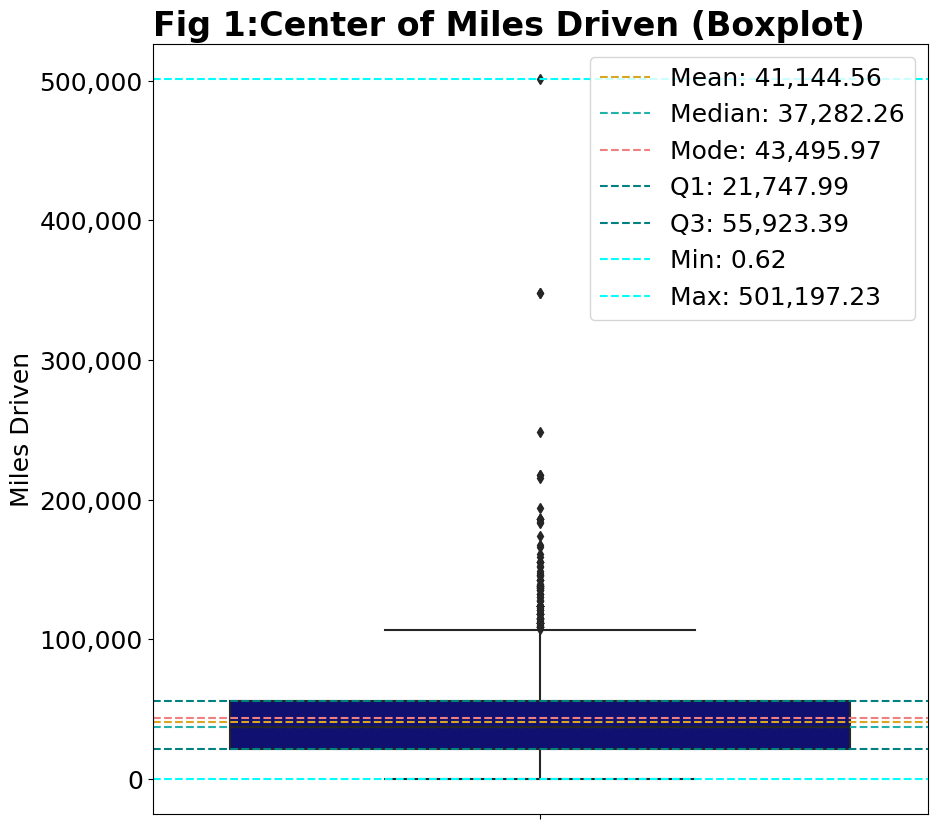

In [14]:
########################################
### Section 02: Center & Spread Measurements
### Step 11: Miles Driven - Center & Spread - Box Plot
########################################
#https://stackoverflow.com/questions/29188757/specify-format-of-floats-for-tick-labels
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.figure(figsize=(10,10))
sns.boxplot(y='miles_driven', data=data2, color = 'navy')
plt.title('Fig 1:Center of Miles Driven (Boxplot)',fontsize=24, color="black", fontweight='bold', loc = 'left') 
plt.ylabel('Miles Driven',fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
plt.axhline(stat_var_01_mean, color='goldenrod', linestyle='dashed', linewidth=1.5, label=f'Mean: {stat_var_01_mean_formatted}')
plt.axhline(stat_var_01_median, color='lightseagreen', linestyle='dashed', linewidth=1.5, label=f'Median: {stat_var_01_median_formatted}')
plt.axhline(stat_var_01_mode[0], color='lightcoral', linestyle='dashed', linewidth=1.5, label=f'Mode: {stat_var_01_mode_formatted}')
plt.axhline(stat_var_01_quant_25, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q1: {stat_var_01_quant_25_formatted}') 
plt.axhline(stat_var_01_quant_75, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q3: {stat_var_01_quant_75_formatted}') 
plt.axhline(stat_var_01_min, color='aqua', linestyle='dashed', linewidth=1.5, label=f'Min: {stat_var_01_min_formatted}') 
plt.axhline(stat_var_01_max, color='aqua', linestyle='dashed', linewidth=1.5, label=f'Max: {stat_var_01_max_formatted}') 
plt.legend(fontsize=18, loc = "upper right")
plt.show()

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


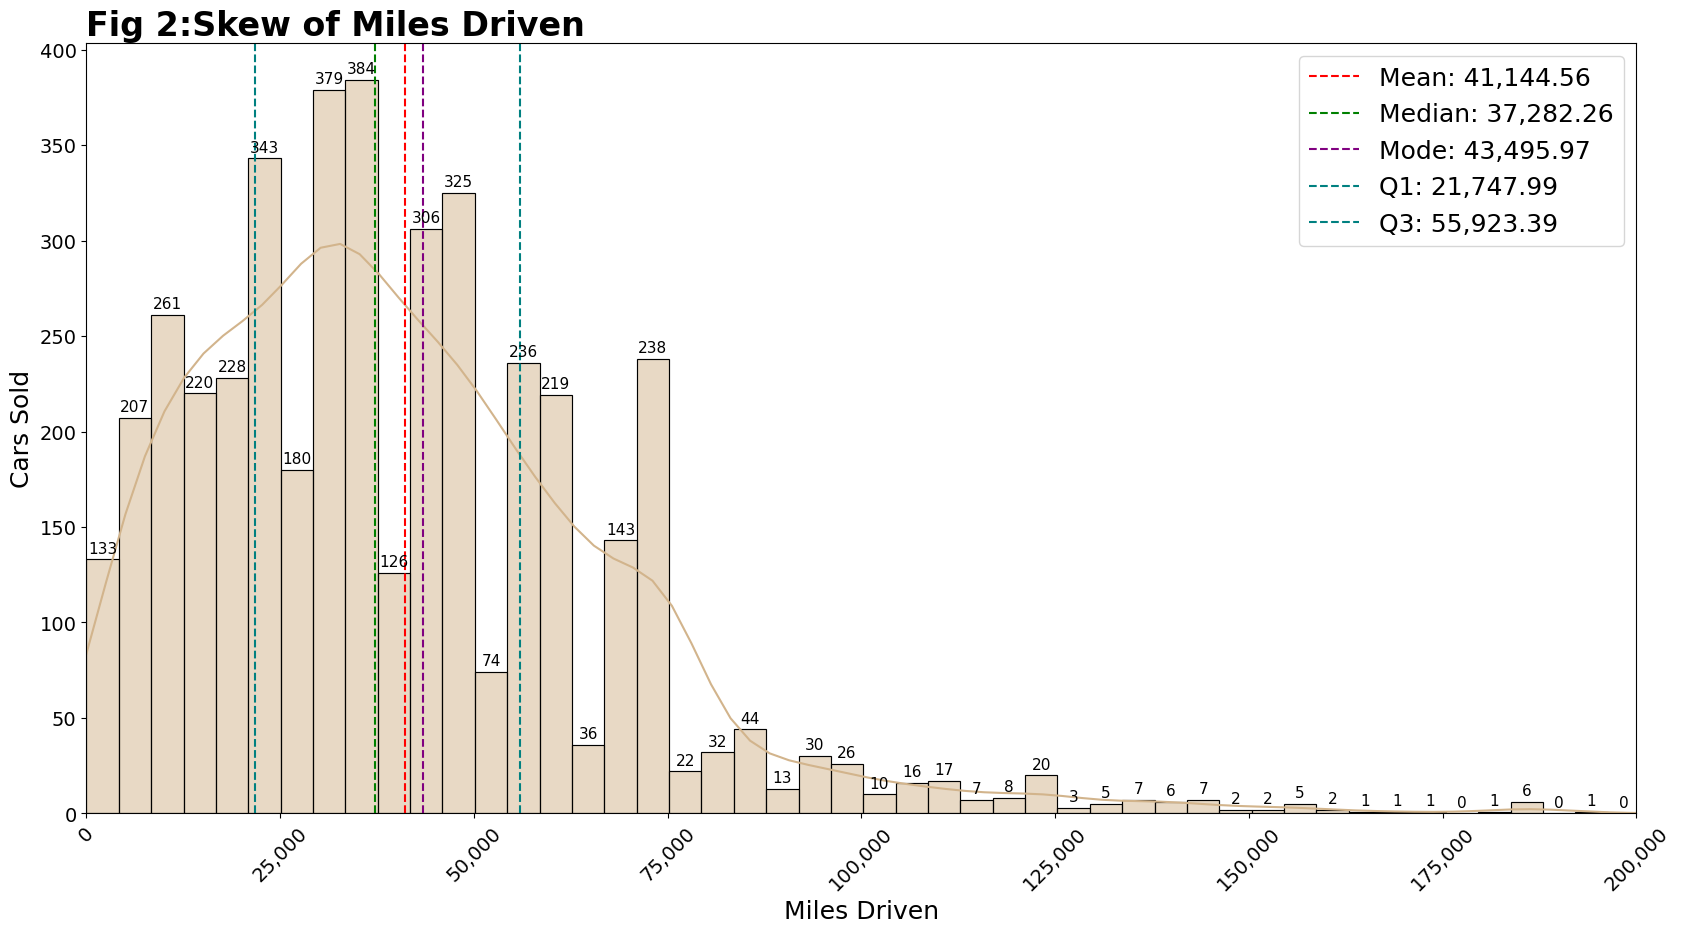


 The Miles Driven attribute is a positive skew with a value: 2.67, 
 It is a unimodal and hence as visible in the viz. The right tail is longer, leaning to the left


In [15]:
########################################
### Section 02: Center & Spread Measurements
### Step 12: Miles Driven - Center & Spread & Skew - Histogram
########################################

#https://seaborn.pydata.org/generated/seaborn.histplot.html
#https://www.geeksforgeeks.org/remove-infinite-values-from-a-given-pandas-dataframe/

x_var = 'miles_driven'
 
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(data=data2, x= x_var, ax = ax, color = 'tan', kde=True)
ax.set_xlabel("Miles Driven", fontsize=18, color="black")
ax.set_xlim(0, 200000)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
# ax.set_aspect(aspect = 20)
ax.set_ylabel("Cars Sold", fontsize=18, color="black")
ax.yaxis.set_major_formatter('{x:1,.0f}')
ax.xaxis.set_major_formatter('{x:1,.0f}')
ax.set_title('Fig 2:Skew of Miles Driven', fontsize=24, color="black", fontweight='bold', loc = 'left')
ax.tick_params(axis = 'both', which='major', labelsize = 14)
plt.xticks(rotation=45)
plt.axvline(stat_var_01_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {stat_var_01_mean_formatted}')
plt.axvline(stat_var_01_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {stat_var_01_median_formatted}')
plt.axvline(stat_var_01_mode[0], color='purple', linestyle='dashed', linewidth=1.5, label=f'Mode: {stat_var_01_mode_formatted}')
plt.axvline(stat_var_01_quant_25, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q1: {stat_var_01_quant_25_formatted}') 
plt.axvline(stat_var_01_quant_75, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q3: {stat_var_01_quant_75_formatted}') 
plt.legend(fontsize=18, loc = "upper right")
### Add labels to the bars
###https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for bar in ax.patches:  
#  # Using Matplotlib's annotate function and
#  # passing the coordinates where the annotation shall be done
#  # x-coordinate: bar.get_x() + bar.get_width() / 2
#  # y-coordinate: bar.get_height()
#  # free space to be left to make graph pleasing: (0, 8)
#  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),  # Increase the y-offset to move the text further from the bars
                   textcoords='offset points')
    
plt.show()

skew_distance = data2['miles_driven'].skew()
var_format = '{:,.2f}'
skew_distance_formatted = var_format.format(skew_distance)
print(f"\n The Miles Driven attribute is a positive skew with a value: {skew_distance_formatted}, "
      +"\n It is a unimodal and hence as visible in the viz. The right tail is longer, leaning to the left")

In [16]:
########################################
### Section 02: Center & Spread Measurements
### Step 13: Selling Price USD - Center & Spread - Text Output
########################################
 
stat_var_02 = 'selling_price_usd'
var_format = '${:,.2f}'
var_format_2 = '{:,.0f}'
 
print('Measures of center for ' + str(stat_var_02) + ':\n')
 
#mean
stat_var_02_mean = data2[stat_var_02].mean()
stat_var_02_mean_formatted = var_format.format(stat_var_02_mean)                          
#print('The mean of ' + str(stat_var_02) + ' is ' + str(stat_var_02_mean_formatted) + '.')
print('mean: ' +  str(stat_var_02_mean_formatted))
 
#median
stat_var_02_median = data2[stat_var_02].median()
stat_var_02_median_formatted = var_format.format(stat_var_02_median)                          
#print('The median of ' + str(stat_var_02) + ' is ' + str(stat_var_02_median_formatted) + '.')
print('median: ' +  str(stat_var_02_median_formatted))
 
#mode
stat_var_02_mode = data2[stat_var_02].mode()
stat_var_02_mode_first = stat_var_02_mode.iloc[0] #iloc returns the first value, in case there are multiple mode results
stat_var_02_mode_formatted = var_format.format(stat_var_02_mode_first)  
stat_var_02_mode_count = data2[stat_var_02].value_counts()[stat_var_02_mode_first]
#print('The mode of ' + str(stat_var_02) + ' is ' + str(stat_var_02_mode_formatted) + ', with a total count of ' + str(stat_var_02_mode_count) + '.')
print('mode: ' +  str(stat_var_02_mode_formatted))
print('mode count: ' +  str(stat_var_02_mode_count))
 
print('\nMeasures of spread for ' + str(stat_var_02) + ':\n')
 
#min
stat_var_02_min = data2[stat_var_02].min()
stat_var_02_min_formatted = var_format.format(stat_var_02_min)                          
#print('The minimum value of ' + str(stat_var_02) + ' is ' + str(stat_var_02_min_formatted) + '.')
print('min: ' +  str(stat_var_02_min_formatted))
 
#max
stat_var_02_max = data2[stat_var_02].max()
stat_var_02_max_formatted = var_format.format(stat_var_02_max)                          
#print('The maximum value of ' + str(stat_var_02) + ' is ' + str(stat_var_02_max_formatted) + '.')
print('max: ' +  str(stat_var_02_max_formatted))
 
#standard deviation
stat_var_02_std_dev = data2[stat_var_02].std()
stat_var_02_std_dev_formatted = var_format.format(stat_var_02_std_dev)
stat_var_02_std_dev_plus_01 = var_format.format(stat_var_02_mean + stat_var_02_std_dev)
stat_var_02_std_dev_minus_01 = var_format.format(stat_var_02_mean - stat_var_02_std_dev)
#print('The standard deviation of ' + str(stat_var_02) + ' is ' + str(stat_var_02_std_dev_formatted) + '.')
#print('the mean-minus-one standard deviation is ' + str(stat_var_02_std_dev_minus_01) + ', while the mean-plus-one is ' + stat_var_02_std_dev_plus_01 + '.')
print('standard deviation: ' +  str(stat_var_02_std_dev_formatted))
print('standard deviation plus 1: ' +  str(stat_var_02_std_dev_plus_01))
print('standard deviation minus 1: ' +  str(stat_var_02_std_dev_minus_01))
 
#variance
stat_var_02_var = data2[stat_var_02].var()
stat_var_02_var_formatted = var_format.format(stat_var_02_var)                          
#print('The variance of ' + str(stat_var_02) + ' is ' + str(stat_var_02_var_formatted) + '.')
print('variance: ' +  str(stat_var_02_var_formatted))
 
#quantile
#https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.quantile.html
stat_var_02_quant_25 = data2[stat_var_02].quantile(.25)
stat_var_02_quant_25_formatted = var_format.format(stat_var_02_quant_25)                          
#print('The Q1 quartile value of ' + str(stat_var_02) + ' is ' + str(stat_var_02_quant_25_formatted) + '.')
print('1st quartile: ' +  str(stat_var_02_quant_25_formatted))
 
 
stat_var_02_quant_75 = data2[stat_var_02].quantile(.75)
stat_var_02_quant_75_formatted = var_format.format(stat_var_02_quant_75)                          
#print('The Q3 quartile value of ' + str(stat_var_02) + ' is ' + str(stat_var_02_quant_75_formatted) + '.')
print('3rd quartile: ' +  str(stat_var_02_quant_75_formatted))
 
stat_var_02_iqr = stat_var_02_quant_75 - stat_var_02_quant_25
stat_var_02_iqr_formatted = var_format.format(stat_var_02_iqr)  
#print('The interquartile range (IQR) of ' + str(stat_var_02) + ' is ' + str(stat_var_02_iqr_formatted) + '.')
print('IQR:' + str(stat_var_02_iqr_formatted) + '.')
 
#define if the measures for that column are within the IQR
stat_var_02_col = 'flag_' + stat_var_02 + '_iqr'
data2[stat_var_02_col] = data2[stat_var_02].between(stat_var_02_quant_25, stat_var_02_quant_75)
 
data2_stat_var_02 = data2[stat_var_02_col] == True
data2_stat_var_02_counts = data2_stat_var_02.value_counts()
data2_stat_var_02_counts_true_formatted = var_format_2.format(data2_stat_var_02_counts[True])
print('Total Records within IQR: ' + str(data2_stat_var_02_counts_true_formatted))

Measures of center for selling_price_usd:

mean: $6,049.53
median: $4,200.00
mode: $3,600.00
mode count: 162

Measures of spread for selling_price_usd:

min: $240.00
max: $106,800.00
standard deviation: $6,942.58
standard deviation plus 1: $12,992.11
standard deviation minus 1: $-893.06
variance: $48,199,484.17
1st quartile: $2,505.00
3rd quartile: $7,200.00
IQR:$4,695.00.
Total Records within IQR: 2,198


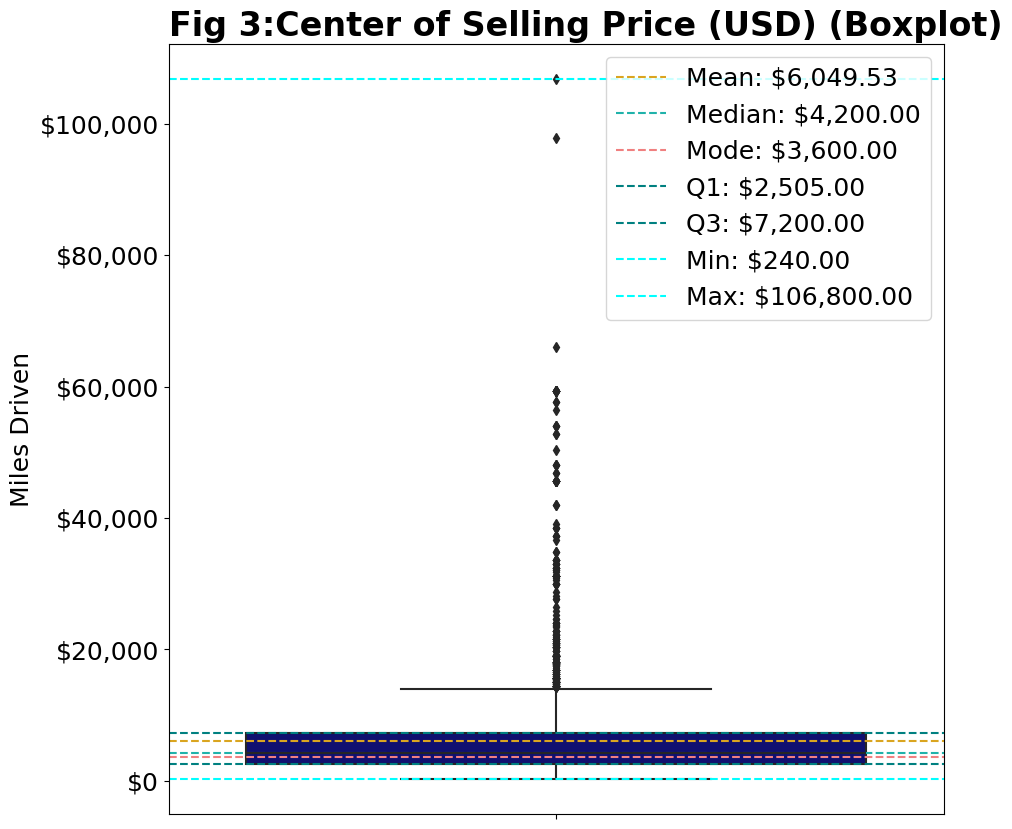

In [17]:
########################################
### Section 02: Center & Spread Measurements
### Step 14: Selling Price USD - Center & Spread - Box Plot
########################################
#https://stackoverflow.com/questions/29188757/specify-format-of-floats-for-tick-labels
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.figure(figsize=(10,10))
sns.boxplot(y='selling_price_usd', data=data2, color = 'navy')
plt.title('Fig 3:Center of Selling Price (USD) (Boxplot)',fontsize=24, color="black", fontweight='bold', loc = 'left') 
plt.ylabel('Miles Driven',fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=18)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')) # No decimal places
plt.axhline(stat_var_02_mean, color='goldenrod', linestyle='dashed', linewidth=1.5, label=f'Mean: {stat_var_02_mean_formatted}')
plt.axhline(stat_var_02_median, color='lightseagreen', linestyle='dashed', linewidth=1.5, label=f'Median: {stat_var_02_median_formatted}')
plt.axhline(stat_var_02_mode[0], color='lightcoral', linestyle='dashed', linewidth=1.5, label=f'Mode: {stat_var_02_mode_formatted}')
plt.axhline(stat_var_02_quant_25, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q1: {stat_var_02_quant_25_formatted}') 
plt.axhline(stat_var_02_quant_75, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q3: {stat_var_02_quant_75_formatted}') 
plt.axhline(stat_var_02_min, color='aqua', linestyle='dashed', linewidth=1.5, label=f'Min: {stat_var_02_min_formatted}') 
plt.axhline(stat_var_02_max, color='aqua', linestyle='dashed', linewidth=1.5, label=f'Max: {stat_var_02_max_formatted}') 
plt.legend(fontsize=18, loc = "upper right")
plt.show()

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


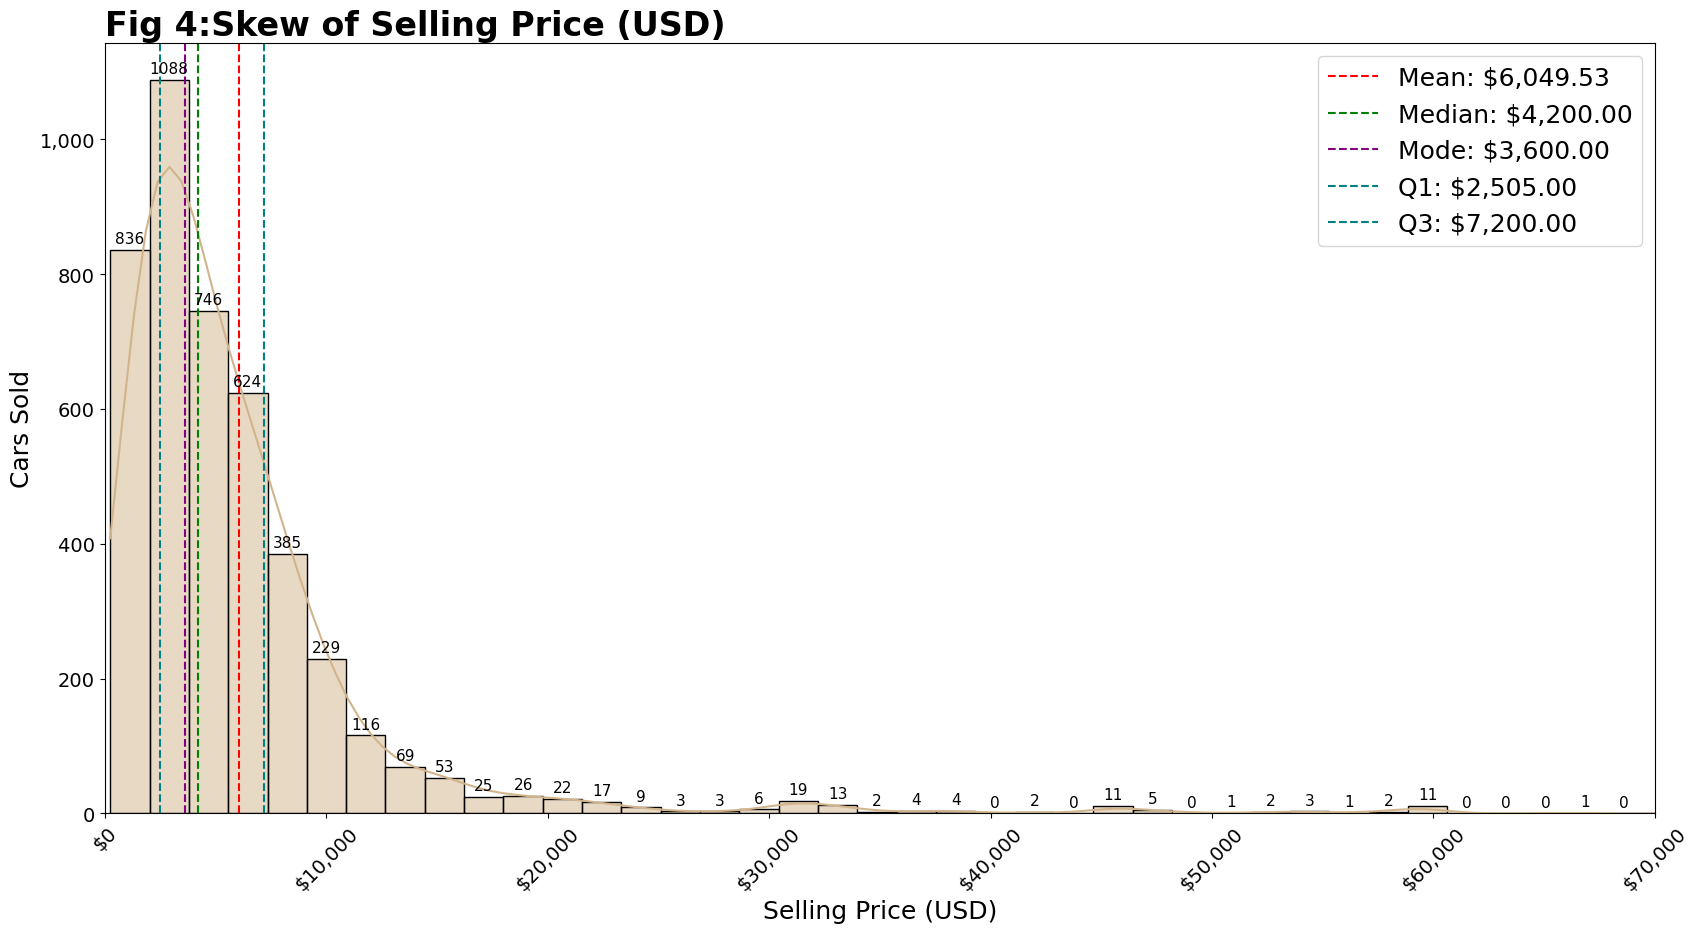


 The Selling Price attribute is a positive skew with a value: 4.89, 
 It is a unimodal and hence as visible in the viz. The right tail is longer, leaning to the left


In [18]:
########################################
### Section 02: Center & Spread Measurements
### Step 15: Selling Price USD - Center & Spread & Skew - Histogram
########################################
#https://seaborn.pydata.org/generated/seaborn.histplot.html
x_var = 'selling_price_usd'
mean_price = data2[x_var].mean()
median_price = data2[x_var].median()
mode_price = data2[x_var].mode()[0]
 
fig, ax = plt.subplots(figsize=(20,10))
 
sns.histplot(data=data2, x= x_var, ax = ax, color = 'tan', bins = 60, kde=True)
ax.set_xlabel("Selling Price (USD)", fontsize=18, color="black")
ax.set_xlim(0, 70000)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
#ax.set_aspect(aspect = 20)
ax.set_ylabel("Cars Sold", fontsize=18, color="black")
ax.yaxis.set_major_formatter('{x:1,.0f}')
ax.xaxis.set_major_formatter('${x:1,.0f}')
ax.set_title('Fig 4:Skew of Selling Price (USD)', fontsize=24, color="black", fontweight='bold', loc = 'left')
ax.tick_params(axis = 'both', which='major', labelsize = 14)
plt.xticks(rotation=45)
plt.axvline(stat_var_02_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {stat_var_02_mean_formatted}')
plt.axvline(stat_var_02_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {stat_var_02_median_formatted}')
plt.axvline(stat_var_02_mode[0], color='purple', linestyle='dashed', linewidth=1.5, label=f'Mode: {stat_var_02_mode_formatted}')
plt.axvline(stat_var_02_quant_25, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q1: {stat_var_02_quant_25_formatted}') 
plt.axvline(stat_var_02_quant_75, color='teal', linestyle='dashed', linewidth=1.5, label=f'Q3: {stat_var_02_quant_75_formatted}') 
plt.legend(fontsize=18)
### Add labels to the bars
###https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for bar in ax.patches:  
#  # Using Matplotlib's annotate function and
#  # passing the coordinates where the annotation shall be done
#  # x-coordinate: bar.get_x() + bar.get_width() / 2
#  # y-coordinate: bar.get_height()
#  # free space to be left to make graph pleasing: (0, 8)
#  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),  # Increase the y-offset to move the text further from the bars
                   textcoords='offset points')
plt.show()

skew_distance = data2['selling_price_usd'].skew()
var_format = '{:,.2f}'
skew_distance_formatted = var_format.format(skew_distance)
print(f"\n The Selling Price attribute is a positive skew with a value: {skew_distance_formatted}, "
      +"\n It is a unimodal and hence as visible in the viz. The right tail is longer, leaning to the left")

In [19]:
#########################################
###
##### SECTION 03: Insights Section 01
###
### #####################################

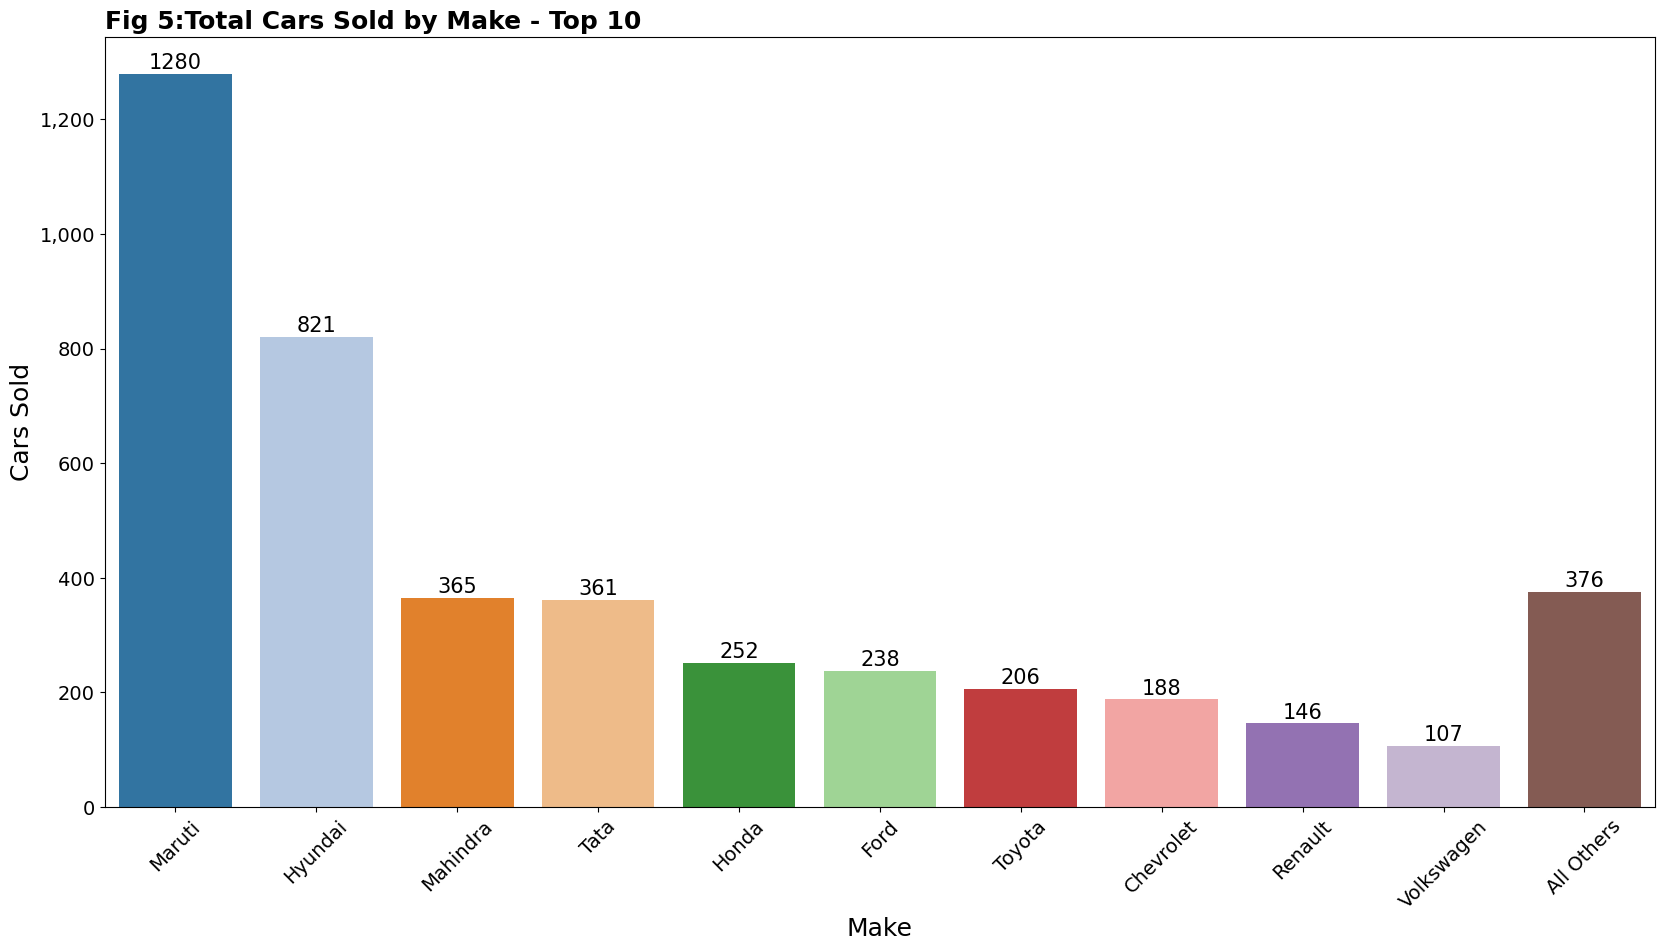

In [20]:
########################################
### SECTION 03: Insights Section 01
### Step 16: Total Cars Sold by Make - Count
########################################

x_var = 'make_top_n'

#https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering
#https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/
#https://www.geeksforgeeks.org/check-if-element-exists-in-list-in-python/
label_order = data2[x_var].value_counts(ascending = False).index.tolist() #create list based on initial sort.
if 'All Others' in label_order: #find all others in the list
    label_order.remove('All Others') #drop it
    label_order.append('All Others') #re-add it at the end.

fig, ax = plt.subplots(figsize=(20,10))

sns.countplot(data=data2, x= x_var, ax = ax, order = label_order, palette = 'tab20')
ax.set_xlabel("Make", fontsize=18, color="black")
ax.set_ylabel("Cars Sold", fontsize=18, color="black")
ax.set_title('Fig 5:Total Cars Sold by Make - Top 10', fontsize=18, color="black", fontweight='bold', loc = 'left')
ax.tick_params(axis = 'both', which='major', labelsize = 14)
ax.yaxis.set_major_formatter('{x:1,.0f}')
ax.xaxis.set_major_formatter('{x:1,.0f}')
plt.xticks(rotation=45)
# Add labels to the bars
#https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for bar in ax.patches:  
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(ticks=range(len(label_order)), labels=label_order, rotation=45)    
plt.show()

Maruti is the best-selling car brand in our data.It's an indication of popularity and high demand for that car model

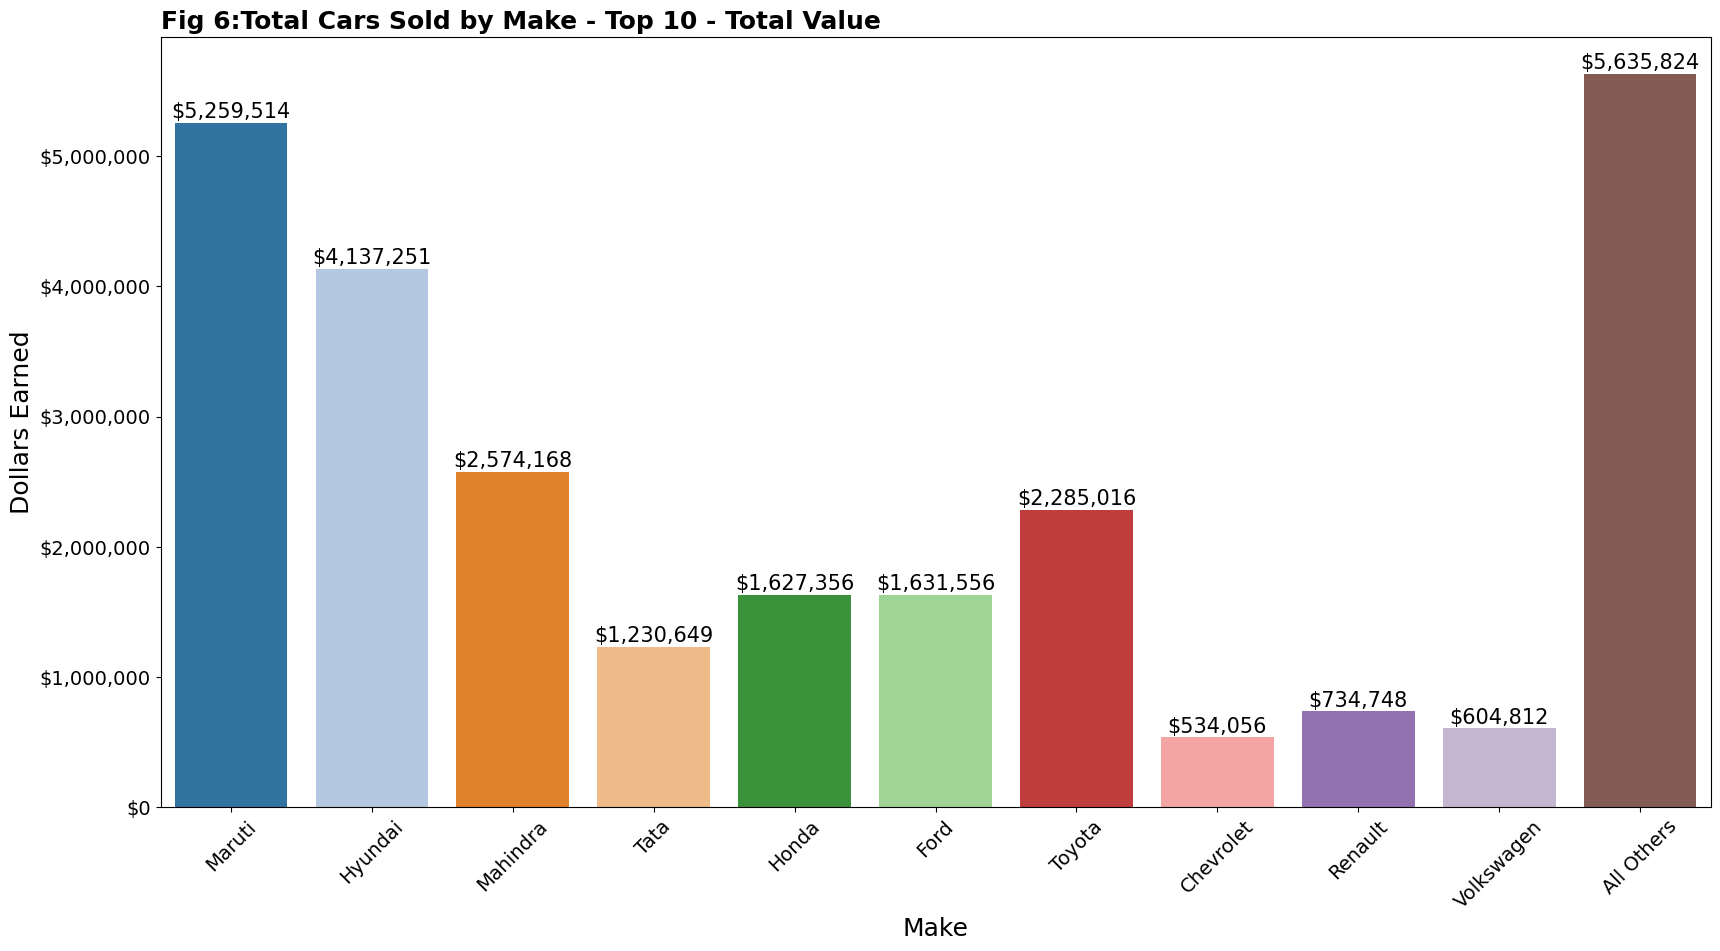

In [21]:
########################################
### SECTION 03: Insights Section 01
### Step 17: Total Cars Sold by Make - Total Value
########################################

x_var = 'make_top_n'
y_var = 'selling_price_usd'
 
#https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering
#https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/
#https://www.geeksforgeeks.org/check-if-element-exists-in-list-in-python/
label_order = data2[x_var].value_counts(ascending = False).index.tolist() #create list based on initial sort.
if 'All Others' in label_order: #find all others in the list
    label_order.remove('All Others') #drop it
    label_order.append('All Others') #re-add it at the end.
 
fig, ax = plt.subplots(figsize=(20,10))
 
sns.barplot(data=data2, x= x_var, y = y_var, ax = ax, estimator="sum", order = label_order, palette = 'tab20', errorbar=None)
ax.set_xlabel("Make", fontsize=18, color="black")
ax.set_ylabel("Dollars Earned", fontsize=18, color="black")
ax.set_title('Fig 6:Total Cars Sold by Make - Top 10 - Total Value', fontsize=18, color="black", fontweight='bold', loc = 'left')
ax.tick_params(axis = 'both', which='major', labelsize = 14)
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter('{x:1,.0f}')
plt.xticks(rotation=45)
# Add labels to the bars
#https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for bar in ax.patches:  
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate('${0:,.0f}'.format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')   
plt.xticks(ticks=range(len(label_order)), labels=label_order, rotation=45)    
plt.show()

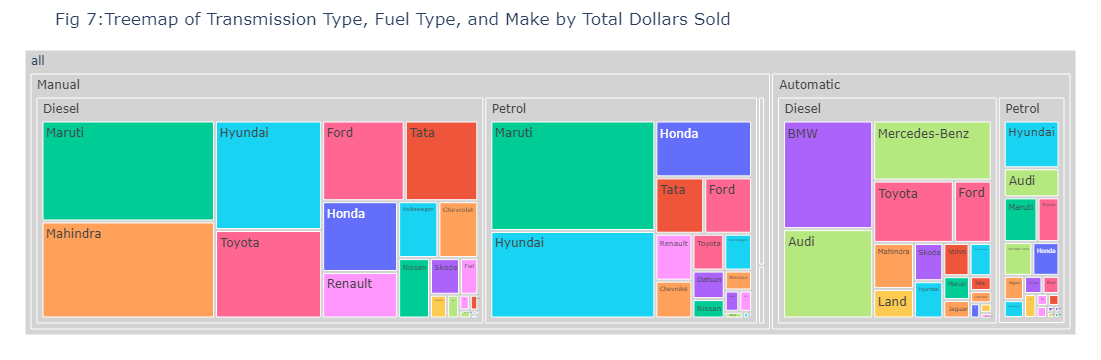

In [22]:
########################################
### SECTION 03: Insights Section 01
### Step 18: Total Cars Sold by Make - Tree Map
########################################
# https://plotly.com/python-api-reference/generated/plotly.express.treemap.html
 
df1 = data2.groupby(["transmission","fuel","make"],as_index=False)[['selling_price_usd']].sum().rename(columns={'selling_price_usd':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","make"], 

values   ='price', color='make',
color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'}, title="Fig 7:Treemap of Transmission Type, Fuel Type, and Make by Total Dollars Sold")

fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

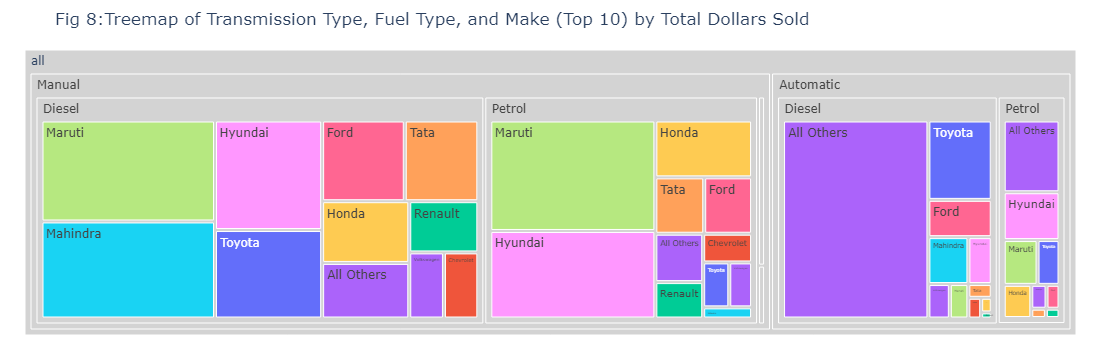

In [23]:
########################################
### SECTION 03: Insights Section 01
### Step 18b: Total Cars Sold by Make - Tree Map (Median)
########################################
# https://plotly.com/python-api-reference/generated/plotly.express.treemap.html

df1 = data2.groupby(["transmission","fuel","make_top_n"],as_index=False)[['selling_price_usd']].sum().rename(columns={'selling_price_usd':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","make_top_n"], 

values   ='price', color='make_top_n',
color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'}, title="Fig 8:Treemap of Transmission Type, Fuel Type, and Make (Top 10) by Total Dollars Sold")

fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

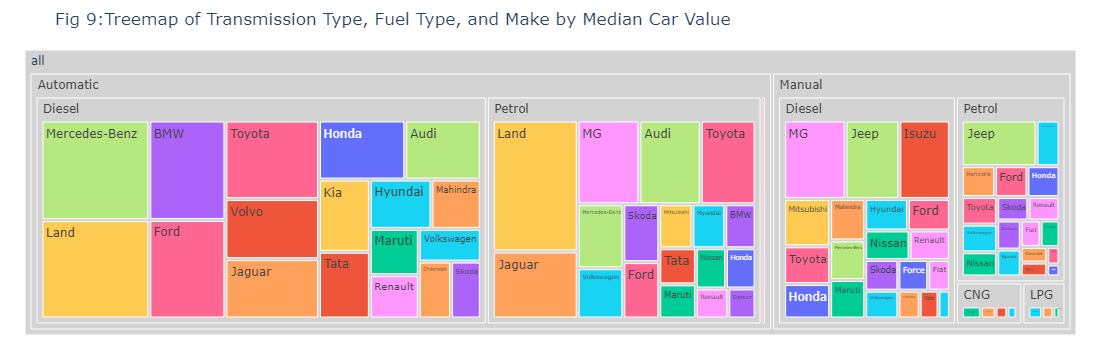

In [24]:
########################################
### SECTION 03: Insights Section 01
### Step 18c: Total Cars Sold by Make - Tree Map (Median)
########################################
# https://plotly.com/python-api-reference/generated/plotly.express.treemap.html

df1 = data2.groupby(["transmission","fuel","make"],as_index=False)[['selling_price_usd']].median().rename(columns={'selling_price_usd':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "transmission","fuel","make"], 
                 values   ='price', color='make',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'}, title="Fig 9:Treemap of Transmission Type, Fuel Type, and Make by Median Car Value")
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



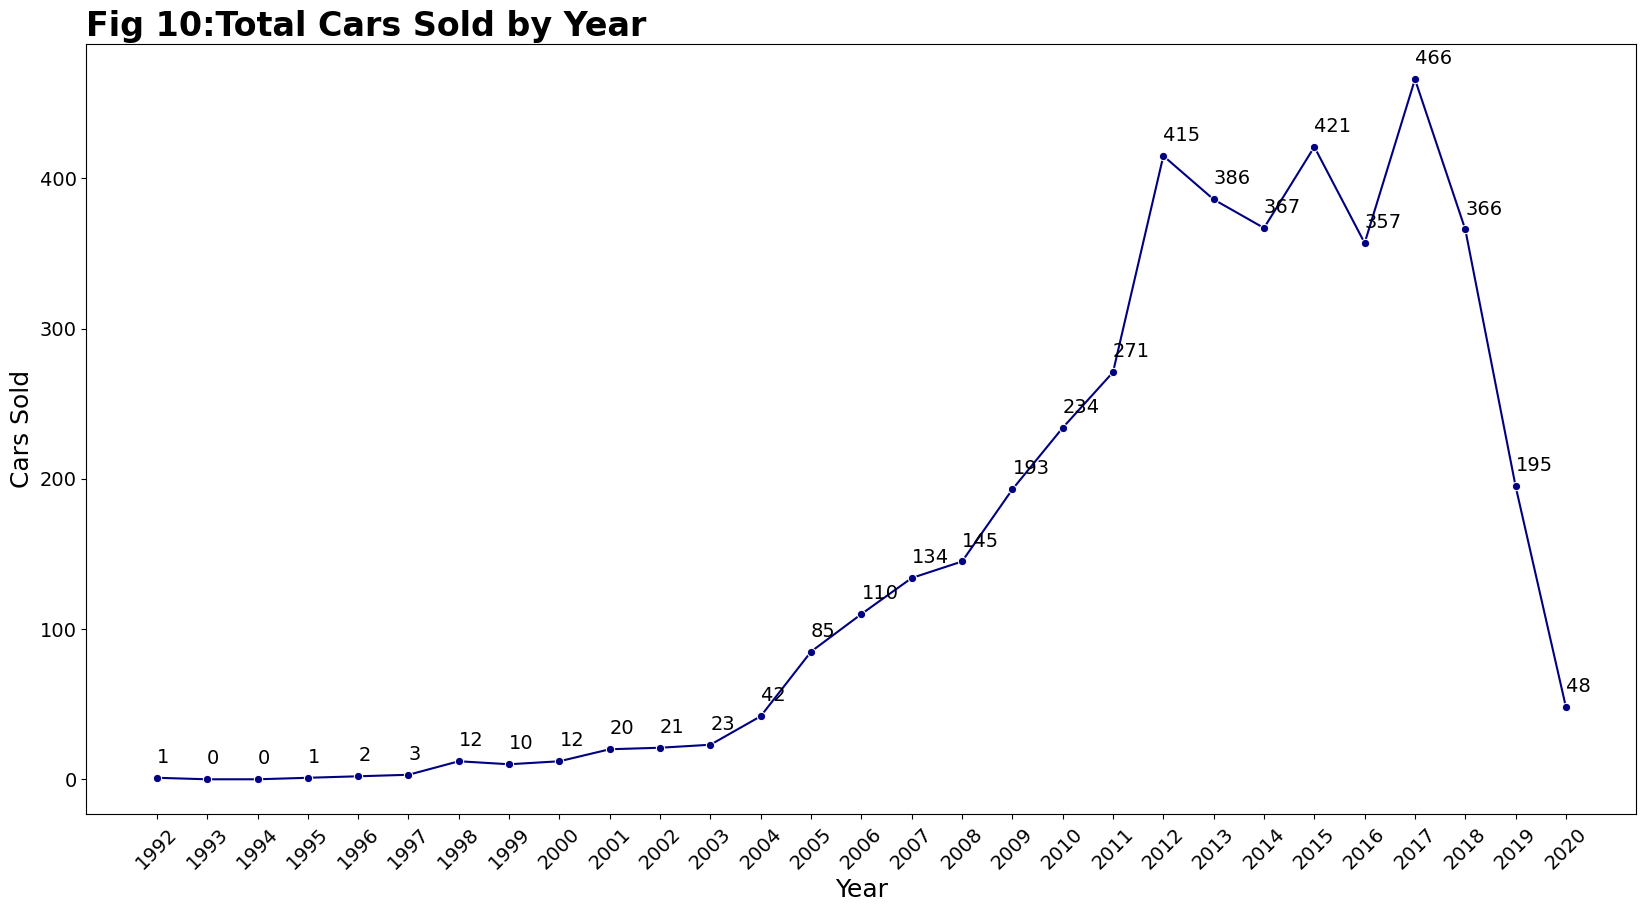

In [25]:
########################################
### SECTION 03: Insights Section 01
### Step 19: Total Cars Sold by Year
########################################

pd.option_context('mode.use_inf_as_na', True)
#Pandas book 13.5
year_list = sorted(data2['year'].unique().tolist())

#https://www.geeksforgeeks.org/python-find-missing-numbers-in-a-sorted-list-range/
def find_missing(lst):
    return [i for x, y in zip(lst, lst[1:]) #List comprehension using zip() 
        for i in range(x + 1, y) if y - x > 1]

#create year_list
year_list_2 = find_missing(year_list) #this finds years missing from the dataset.
year_list.extend(year_list_2)
year_list = sorted(year_list)
year_list = pd.DataFrame({'year': year_list})

#create_padded_year_count 
year_value_counts = data2['year'].value_counts() #count total cars sold by year
year_value_counts = year_value_counts.to_frame() #convert to dataframe
year_value_counts.rename(columns={'count': 'total_sold'},  inplace = True) #rename column to aggregate name
year_value_counts['total_sold'] = year_value_counts['total_sold'].astype(int) #convert aggregate field to int
year_value_counts.reset_index(inplace=True) #move year index over to column
year_value_counts.rename(columns={'index': 'year'},  inplace = True) #rename column to "year"
year_value_counts = year_value_counts.merge(year_list, on = 'year', how='outer') #join year counts to missing list
year_value_counts.fillna(0, inplace=True) #This adds zeros where NaN from the filled values.
year_value_counts = year_value_counts.sort_values(by='year', ascending = True) #sort by year

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot value counts as a line chart
sns.lineplot(data = year_value_counts, x='year', y = 'total_sold', marker='o', color = 'navy', ax=ax)
#sns.lineplot(x=year_value_counts.index, y=value_counts.values, marker='o', color = 'blue', ax=ax)

# Customize the plot
ax.set_xlabel("Year", fontsize=18, color="black")
ax.set_ylabel("Cars Sold", fontsize=18, color="black")
ax.set_title('Fig 10:Total Cars Sold by Year', fontsize=24, color="black", fontweight='bold', loc='left')
ax.set_xticks(year_value_counts['year']) #ensure all years appear.
ax.tick_params(axis='both', which='both', labelsize=14)
plt.xticks(rotation=45)

#https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
# label points on the plot
for x, y in zip(year_value_counts['year'], year_value_counts['total_sold']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
# y = y -150, # y-coordinate position of data label, adjusted to be 150 below the data point
 y = y + 10, # y-coordinate position of data label, adjusted to be 150 below the data point          
 s = '{:.0f}'.format(y), #data label, formatted to ignore decimals
 color = 'black', # set colour of label
 size = 14 #set font size of label
 ) 

plt.show()

The year 2017 being the one with the highest sales at 466 could signify a peak in demand or popularity for cars during that period.It could be due to factors such as attractive models, special promotions, or a favorable economy.








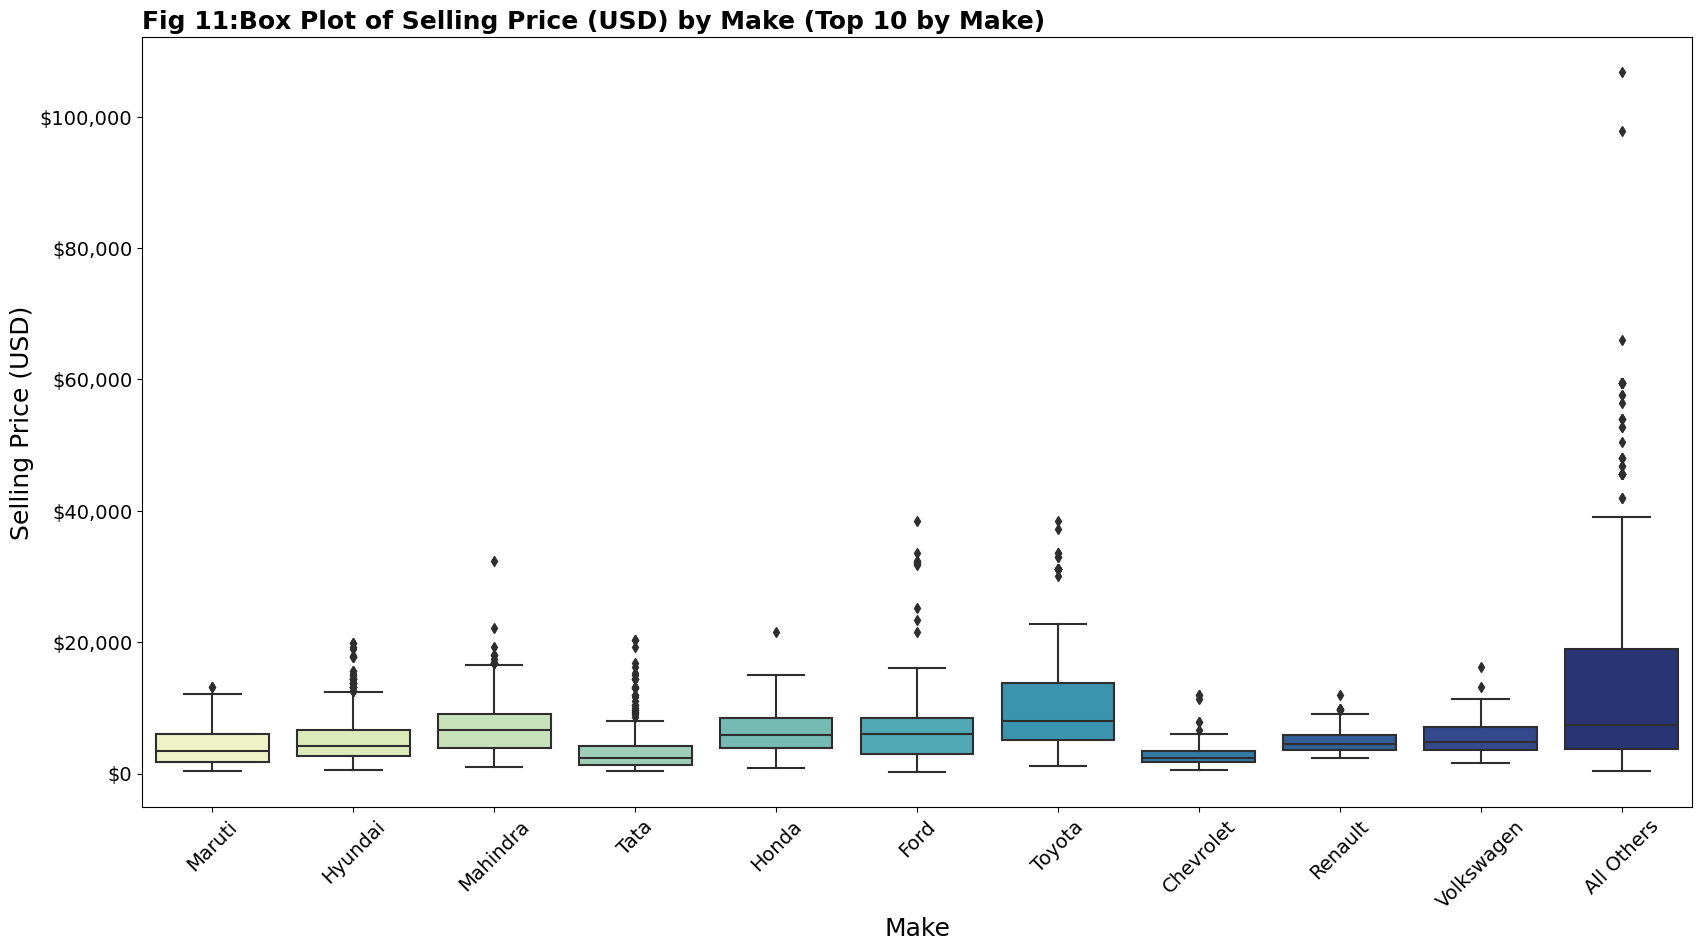

In [26]:
########################################
### SECTION 03: Insights Section 01
### Step 20: Box Plot of Selling Price by Make
########################################

#https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering
#https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/
#https://www.geeksforgeeks.org/check-if-element-exists-in-list-in-python/
label_order = data2[x_var].value_counts(ascending = False).index.tolist() #create list based on initial sort.
if 'All Others' in label_order: #find all others in the list
    label_order.remove('All Others') #drop it
    label_order.append('All Others') #re-add it at the end.
    
x_var = 'make_top_n'
y_var = 'selling_price_usd'
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = data2, x = data2[x_var], y = data2[y_var].values, palette='YlGnBu', ax = ax, order = label_order)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.set_xlabel("Make", fontsize=18, color="black")
ax.set_ylabel("Selling Price (USD)", fontsize=18, color="black")
ax.set_title('Fig 11:Box Plot of Selling Price (USD) by Make (Top 10 by Make)', fontsize=18, color="black", fontweight='bold', loc='left')
ax.tick_params(axis='both', which='both', labelsize=14)
plt.xticks(rotation=45)
plt.show()

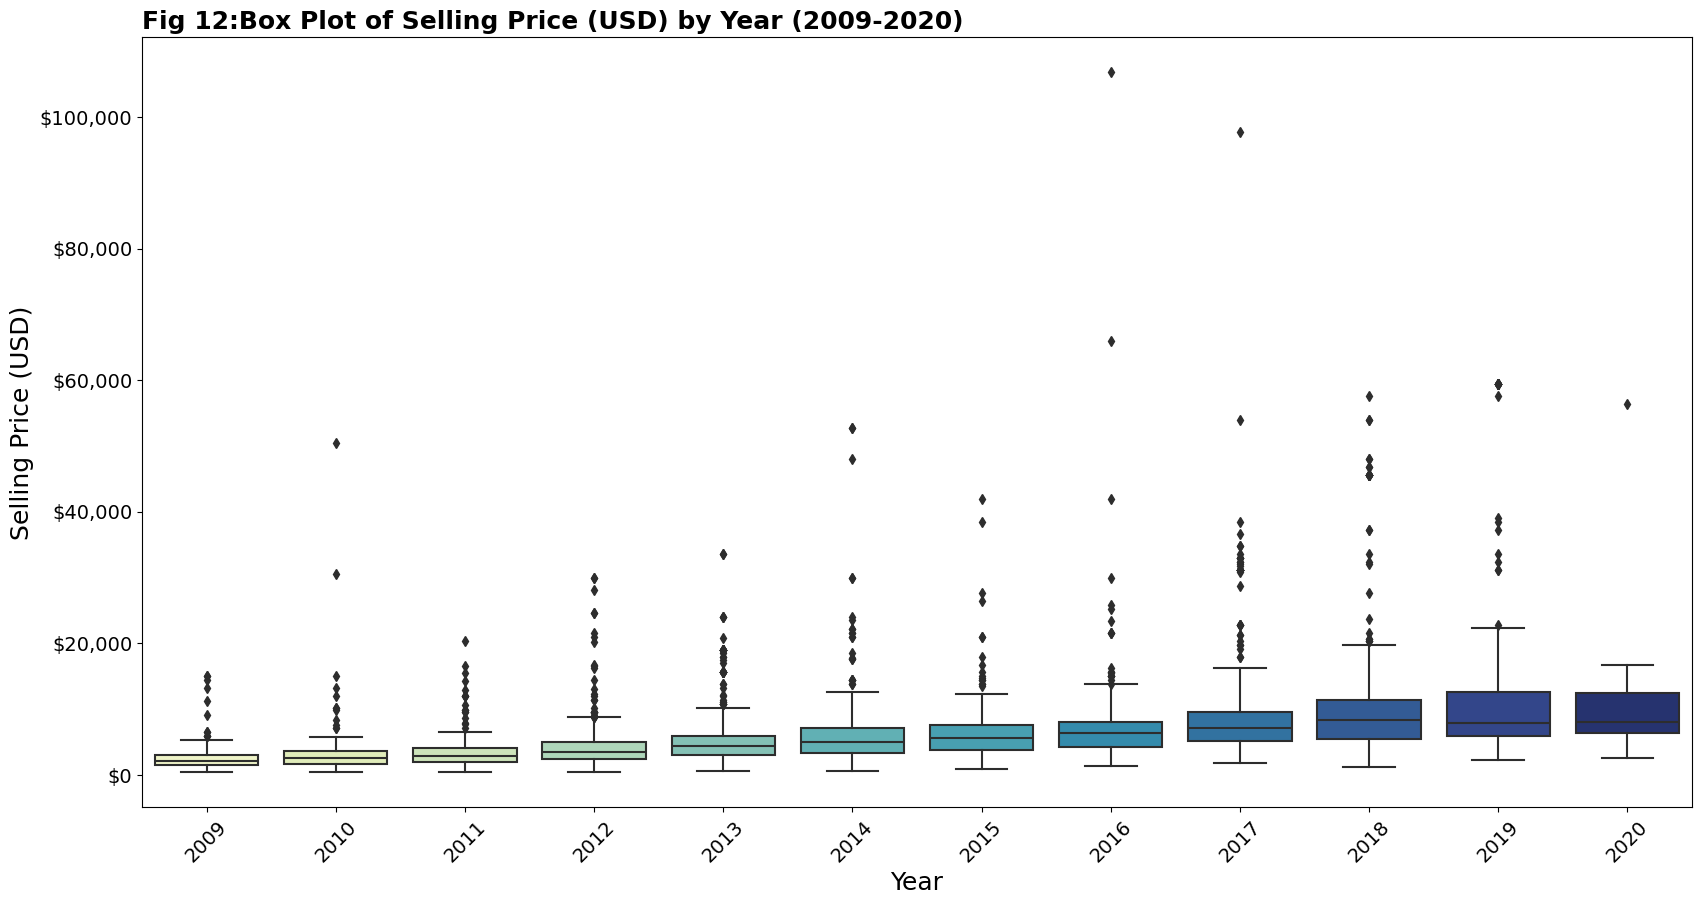

In [27]:
########################################
### SECTION 03: Insights Section 01
### Step 21: Box Plot of Selling Price by Year
########################################

x_var = 'year'
y_var = 'selling_price_usd'
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data = data2[data2['year'] >= 2009], x = x_var, y = y_var, palette='YlGnBu', ax = ax)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.set_xlabel("Year", fontsize=18, color="black")
ax.set_ylabel("Selling Price (USD)", fontsize=18, color="black")
ax.set_title('Fig 12:Box Plot of Selling Price (USD) by Year (2009-2020)', fontsize=18, color="black", fontweight='bold', loc='left')
ax.tick_params(axis='both', which='both', labelsize=14)
plt.xticks(rotation=45)
plt.show()

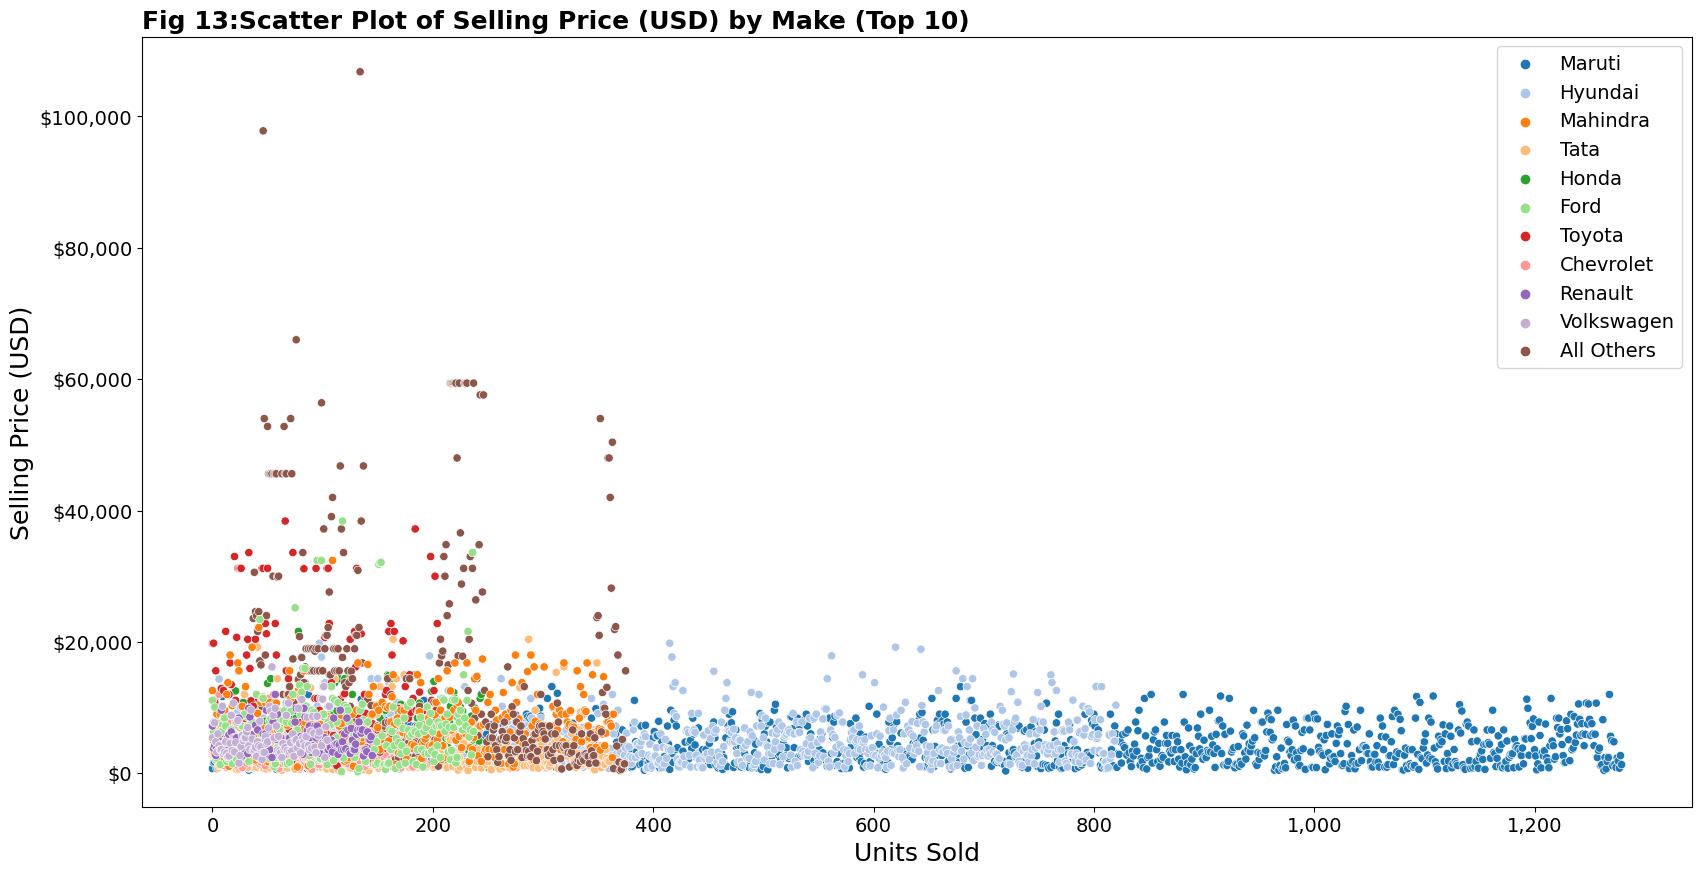

In [28]:
########################################
### SECTION 03: Insights Section 01
### Step 22: Scatter Plot of Selling Price and Units Sold
########################################

x_var = data2.groupby('make_top_n').cumcount()
y_var = 'selling_price_usd'

#https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering
#https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/
#https://www.geeksforgeeks.org/check-if-element-exists-in-list-in-python/
label_var = 'make_top_n'
label_order = data2[label_var].value_counts(ascending = False).index.tolist() #create list based on initial sort.
if 'All Others' in label_order: #find all others in the list
    label_order.remove('All Others') #drop it
    label_order.append('All Others') #re-add it at the end.
    
#https://www.geeksforgeeks.org/scatterplot-using-seaborn-in-python/
#https://stackoverflow.com/questions/59413779/how-to-plot-the-scatter-chart-by-counting-employee-numbers-using-python

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data = data2, x = x_var, y = y_var, hue = 'make_top_n', hue_order = label_order, palette = 'tab20')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter('{x:1,.0f}')
ax.set_xlabel("Units Sold", fontsize=18, color="black")
ax.set_ylabel("Selling Price (USD)", fontsize=18, color="black")
ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_title('Fig 13:Scatter Plot of Selling Price (USD) by Make (Top 10)', fontsize=18, color="black", fontweight='bold', loc='left')
ax.legend(fontsize=14)
plt.show()

This suggests that there is likely an inverse relationship between the selling price of cars and the number of units sold. In other words, car brands with higher prices, exceeding 100,000, sold fewer units, while those with prices below $20,000 sold more units. This may indicate that lower-priced cars are more accessible and therefore more in demand by consumers, whereas high-end cars have a more limited market due to their high prices

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



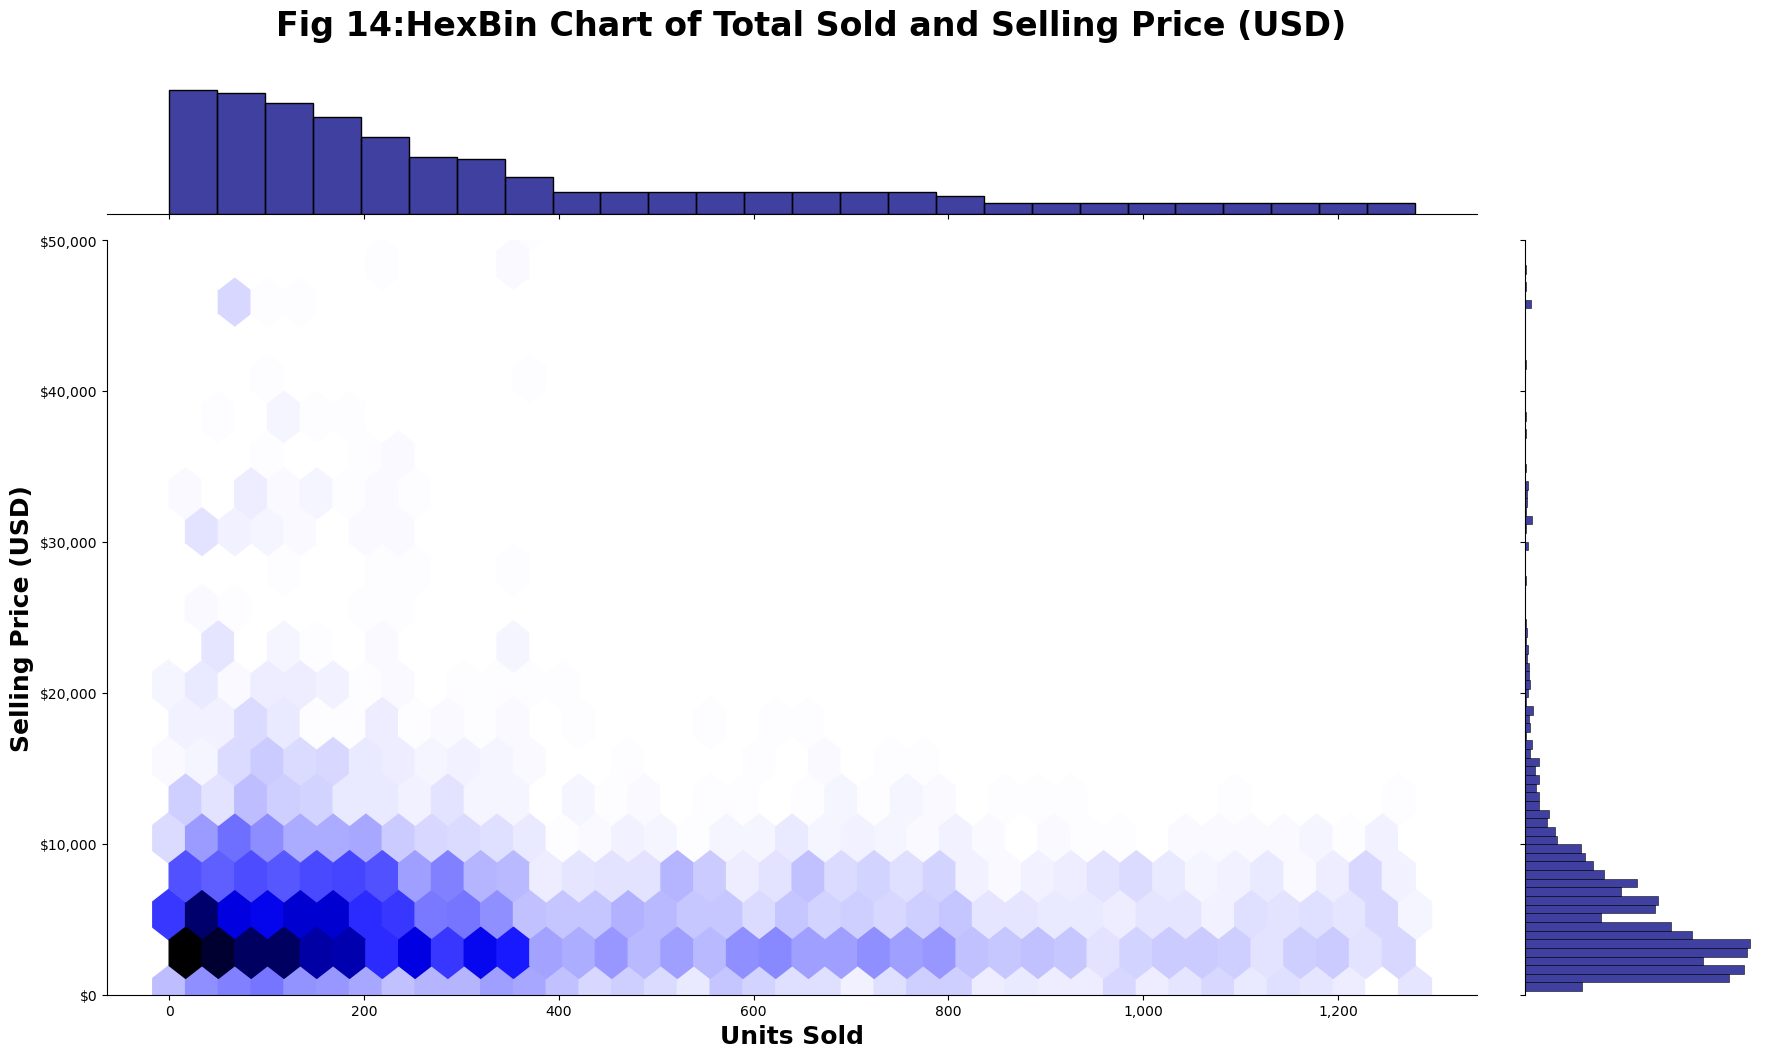

In [29]:
########################################
### SECTION 03: Insights Section 01
### Step 23: Hexbin Plot by Selling Price and Units Sold
########################################

#https://seaborn.pydata.org/generated/seaborn.jointplot.html
#https://seaborn.pydata.org/generated/seaborn.JointGrid.html
#https://stackoverflow.com/questions/49065837/customize-the-axis-label-in-seaborn-jointplot
#https://stackoverflow.com/questions/60358228/how-to-set-title-on-seaborn-jointplot
#https://stackoverflow.com/questions/54095860/python-seaborn-set-xlim-and-ylim-for-jointplot-and-get-rid-of-distribution-infor
#https://www.geeksforgeeks.org/matplotlib-figure-figure-set_figwidth-in-python/
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html

x_var = data2.groupby('make_top_n').cumcount()
y_var = 'selling_price_usd'
y_lim_var = (0, 50000)
label_order = data2[label_var].value_counts(ascending=False).index.tolist()
if 'All Others' in label_order:
    label_order.remove('All Others')
    label_order.append('All Others')

#fig, ax = plt.subplots(figsize=(20, 10))    
viz1 = sns.jointplot(data=data2, x=x_var, y=y_var, kind="hex", color = 'navy', ylim = y_lim_var)
viz1.fig.set_figwidth(20)
viz1.fig.set_figheight(10)
viz1.ax_joint.set_xlabel('Units Sold', fontsize = 18, fontweight='bold')
viz1.ax_joint.set_ylabel('Selling Price (USD)', fontsize = 18, fontweight='bold')
ax.tick_params(axis='both', which='both', labelsize=14)
viz1.ax_joint.yaxis.set_major_formatter('${x:1,.0f}')
viz1.ax_joint.xaxis.set_major_formatter('{x:1,.0f}')
viz1.fig.suptitle('Fig 14:HexBin Chart of Total Sold and Selling Price (USD)', fontsize=24, fontweight='bold', y = 1.05, horizontalalignment ='center')
plt.show() #This is needed with the joint plot to prevent the explanatory text from appearing.

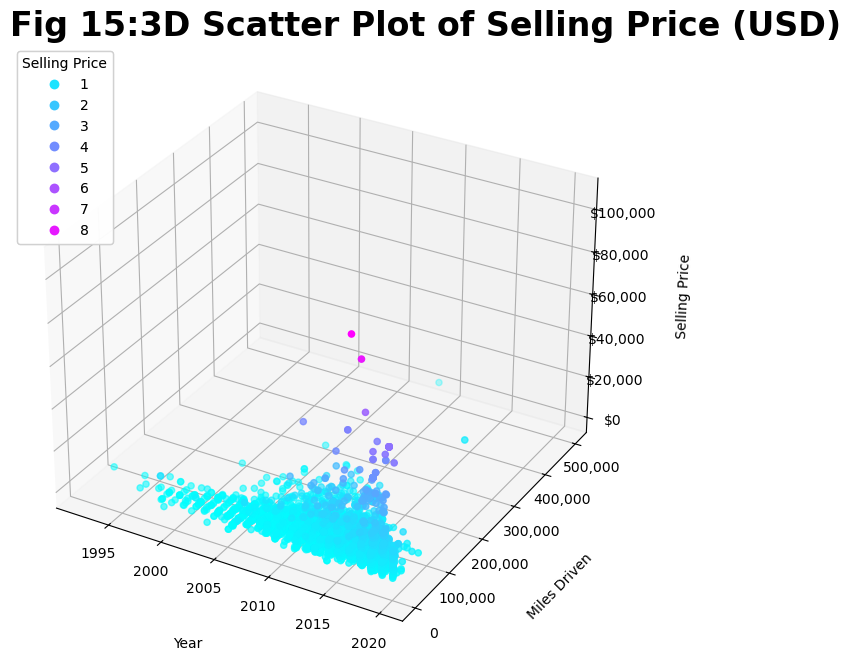

In [30]:
########################################
### SECTION 03: Insights Section 01
### Step 24:  3D Scatter Plot of Year, Selling Price, and Miles Driven
########################################

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data2['year'], data2['miles_driven'], data2['selling_price_usd'], c=data2['selling_price'], cmap='cool')
legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Selling Price")
ax.add_artist(legend)
ax.set_xlabel('Year', labelpad = 20)
ax.set_ylabel('Miles Driven', labelpad = 20)
ax.set_zlabel('Selling Price', labelpad = 20)
ax.zaxis.set_major_formatter('${x:1,.0f}')
ax.yaxis.set_major_formatter('{x:1,.0f}')
ax.xaxis.set_major_formatter('{x:1.0f}')
plt.title('Fig 15:3D Scatter Plot of Selling Price (USD)', loc = "left", fontweight = "bold", fontsize = 24)
plt.show()

In [31]:
########################################
### SECTION 03: Insights Section 01
### Step 25:  Most Expensive and Least Expensive Cars
########################################

most_expensive_car = data2.sort_values(by='selling_price_usd', ascending=False).head(1)
mst_name = most_expensive_car['name'].values[0]
mst_price = most_expensive_car['selling_price_usd'].values[0]
least_expensive_car = data2.sort_values(by='selling_price_usd', ascending=True).head(1)
lst_exp = least_expensive_car['name'].values[0]
lst_price = least_expensive_car['selling_price_usd'].values[0]
print(f" The most expensive car (Petrol) is: {mst_name} and It costs ${mst_price} \n The least expensive car (Petrol) is: {lst_exp} and costs ${lst_price} ") 


 The most expensive car (Petrol) is: Audi RS7 2015-2019 Sportback Performance and It costs $106800.0 
 The least expensive car (Petrol) is: Ford Ikon 1.6 ZXI NXt and costs $240.0 


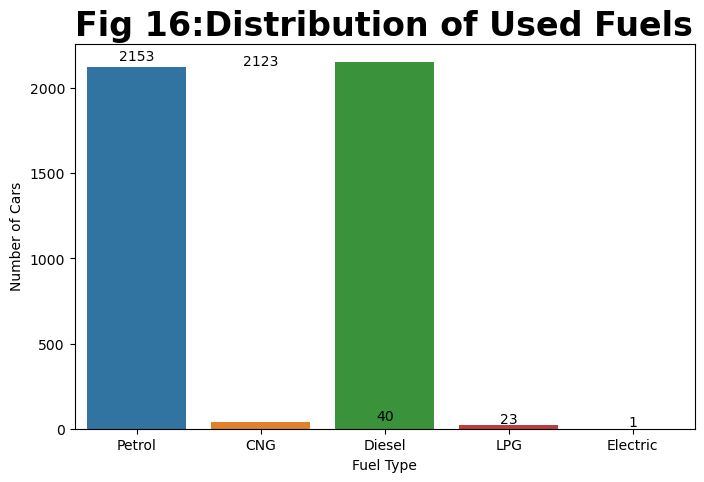

In [32]:
########################################
### SECTION 03: Insights Section 01
### Step 26:  Distribution of Used Fuels
########################################

# Create the count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='fuel')
plt.title('Fig 16:Distribution of Used Fuels', fontsize=24, color="black", fontweight='bold', loc = 'left')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')

# Add annotations for exact numbers
fuel_counts = data2['fuel'].value_counts()
for i, count in enumerate(fuel_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

plt.show()

It may reflect market trends where traditional petrol and diesel cars are still widely used, while the adoption of electric cars and alternative fuels like CNG and LPG may be less prevalent

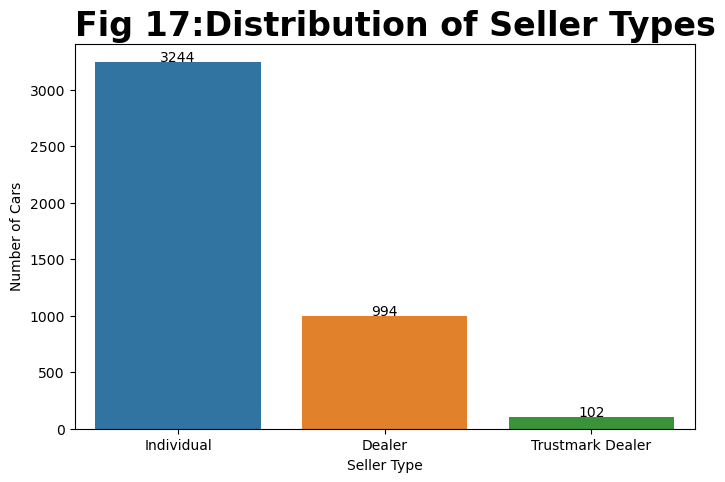

In [33]:
########################################
### SECTION 03: Insights Section 01
### Step 27:  Distribution of Seller Types
########################################

plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='seller_type')
plt.title('Fig 17:Distribution of Seller Types', fontsize=24, color="black", fontweight='bold', loc = 'left')
plt.xlabel('Seller Type')
plt.ylabel('Number of Cars')


# Add annotations for exact numbers
seller_counts = data2['seller_type'].value_counts()
for i, count in enumerate(seller_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)

plt.show()


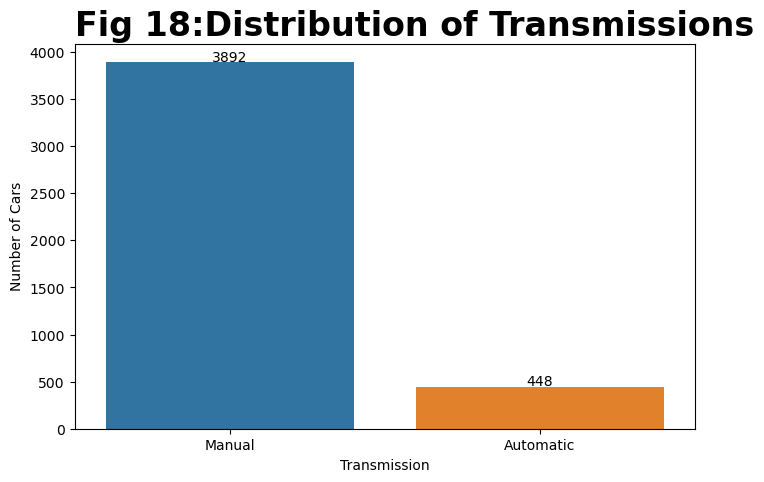

In [34]:
########################################
### SECTION 03: Insights Section 01
### Step 28:  Distribution of Transmissions
########################################


#Analysis of Transmission Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data2, x='transmission')
plt.title('Fig 18:Distribution of Transmissions', fontsize=24, color="black", fontweight='bold', loc = 'left')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
# Add annotations for exact numbers
transmission_counts = data2['transmission'].value_counts()
for i, count in enumerate(transmission_counts):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10)
plt.show()

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



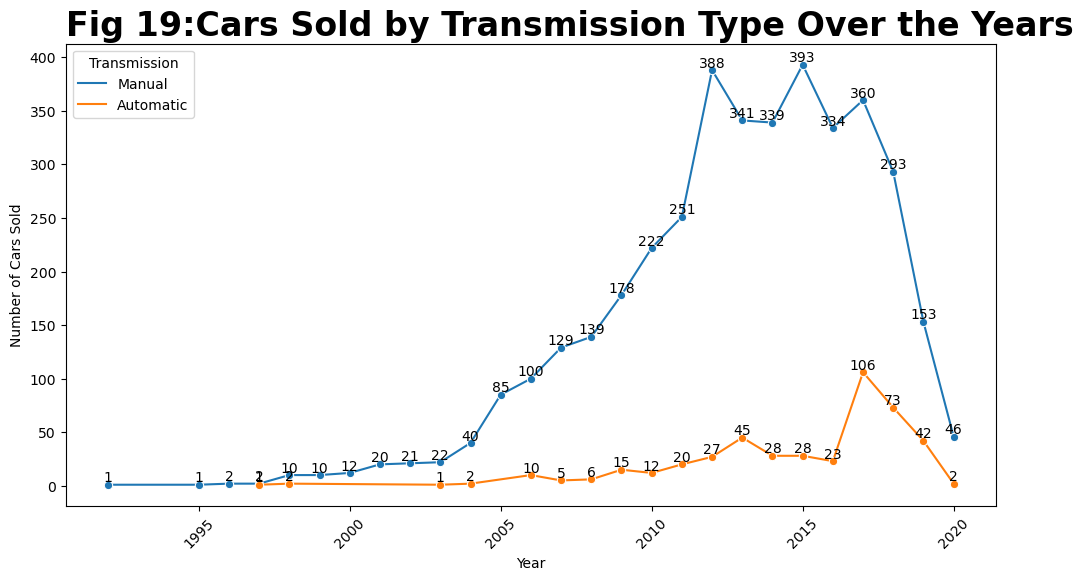

In [35]:
########################################
### SECTION 03: Insights Section 01
### Step 29:  Distribution of cars sold by transmission type over the years
########################################


transmission_year_counts = data2.groupby(['year', 'transmission']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=transmission_year_counts, x='year', y='count', hue='transmission', marker='o')
plt.title('Fig 19:Cars Sold by Transmission Type Over the Years', fontsize=24, color="black", fontweight='bold', loc = 'left')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.legend(title='Transmission')
plt.xticks(rotation=45)

# Add labels to the lines
for line in range(len(transmission_year_counts)):
    plt.text(transmission_year_counts['year'][line], transmission_year_counts['count'][line],
             transmission_year_counts['count'][line], ha='center', va='bottom')

plt.show()

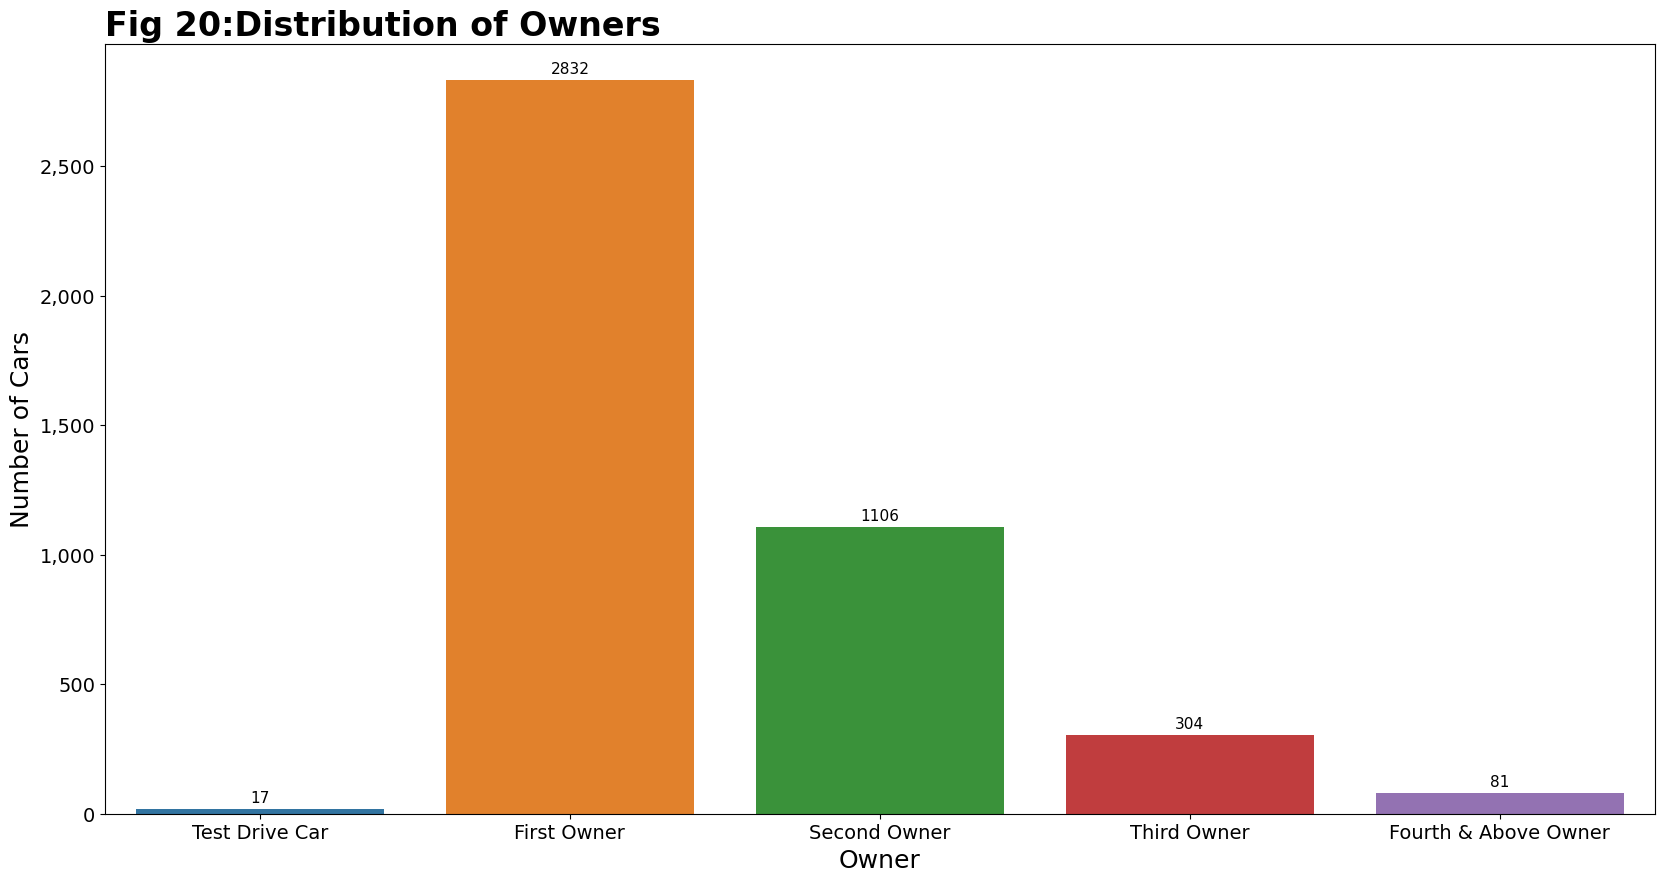

In [36]:
########################################
### SECTION 03: Insights Section 01
### Step 30:  Distribution of Owners
########################################
 
order_list = ['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']
# Analysis of Owner Distribution
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=data2, x='owner',  order = order_list)
plt.title('Fig 20:Distribution of Owners',fontsize=24, color="black", fontweight='bold', loc = 'left')
plt.xlabel('Owner', fontsize = 18)
plt.ylabel('Number of Cars', fontsize = 18)
ax.tick_params(axis = 'both', which='major', labelsize = 14)
ax.yaxis.set_major_formatter('{x:1,.0f}')
# Add annotations for exact numbers
for bar in ax.patches:  
#  # Using Matplotlib's annotate function and
#  # passing the coordinates where the annotation shall be done
#  # x-coordinate: bar.get_x() + bar.get_width() / 2
#  # y-coordinate: bar.get_height()
#  # free space to be left to make graph pleasing: (0, 8)
#  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),  # Increase the y-offset to move the text further from the bars
                   textcoords='offset points')
plt.show()

<Axes: xlabel='owner', ylabel='miles_driven'>

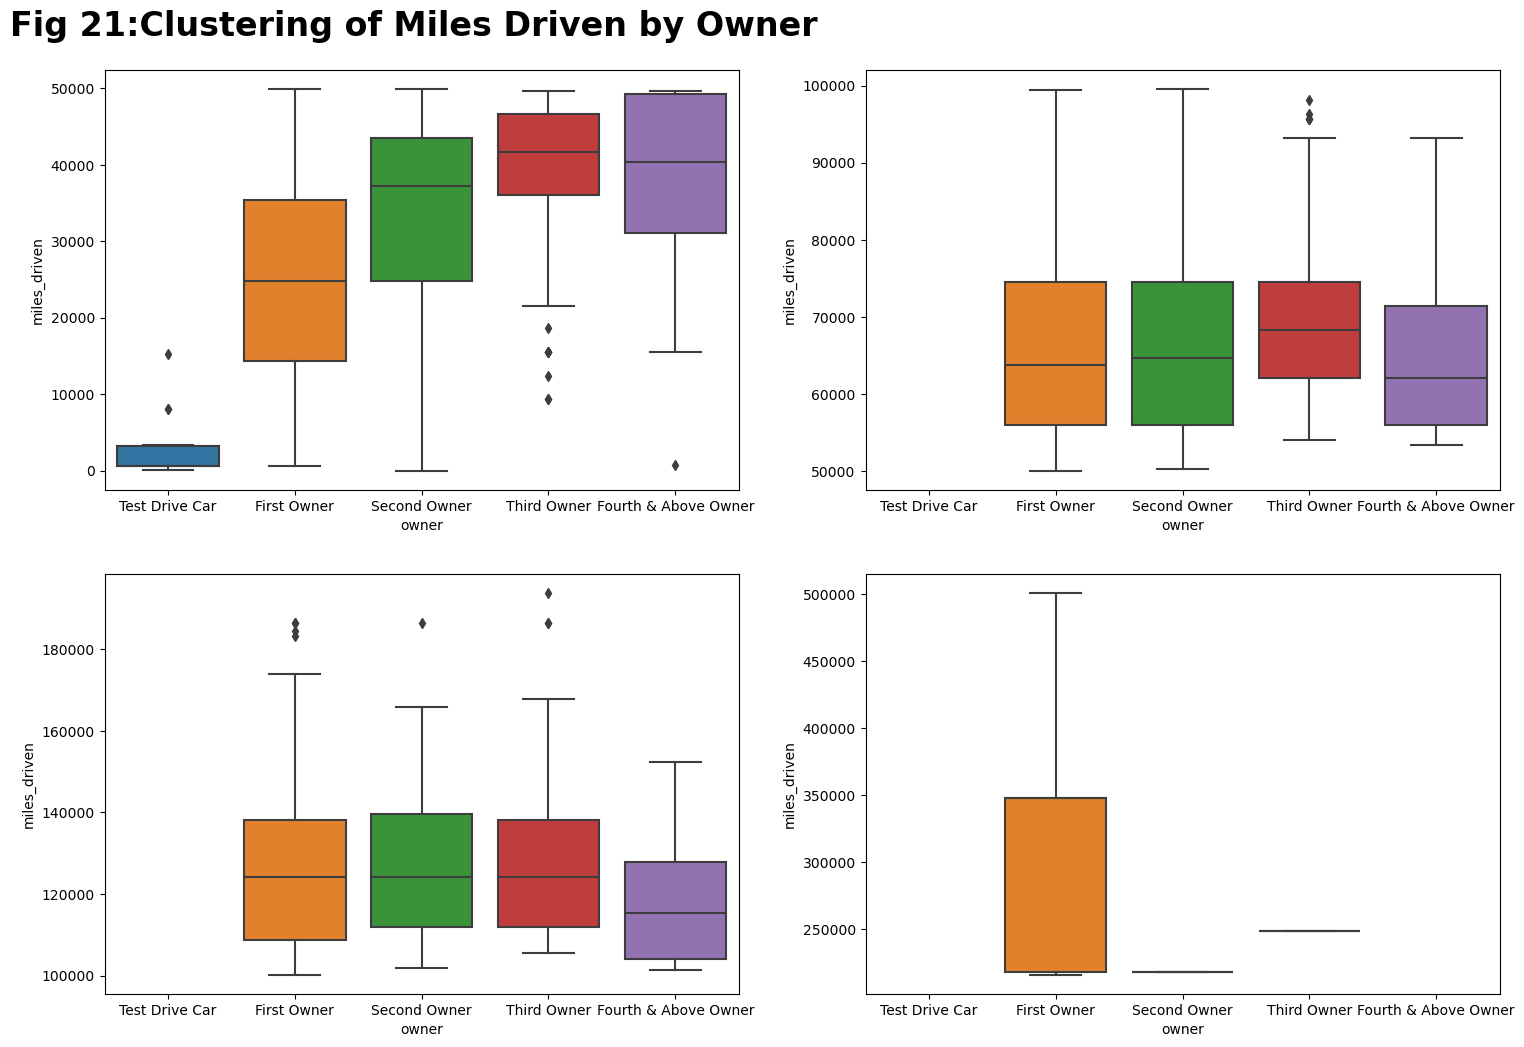

In [37]:
###################################################
### SECTION 03: Insights Section 01
### Step 31:  Clustering of Miles Driven by Owner
###################################################
order_list = ['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth & Above Owner']
#below 50k
df_firstbin = data2[data2['miles_driven']<50000]
df_secbin = data2[(data2['miles_driven'] > 50000) & (data2['miles_driven'] < 100000)]
df_thirdbin = data2[(data2['miles_driven'] > 100000) & (data2['miles_driven'] < 200000)]
df_fourthbin = data2[(data2['miles_driven'] > 200000) ]
 

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Fig 21:Clustering of Miles Driven by Owner ', fontsize=24, color="black", fontweight='bold', horizontalalignment = 'center', x=0.3, y=.93)
sns.boxplot(ax=axes[0, 0], data=df_firstbin, x='owner', y='miles_driven', order = order_list)
sns.boxplot(ax=axes[0, 1], data=df_secbin, x='owner', y='miles_driven', order = order_list)
sns.boxplot(ax=axes[1, 0], data=df_thirdbin, x='owner', y='miles_driven', order = order_list)
sns.boxplot(ax=axes[1, 1], data=df_fourthbin, x='owner', y='miles_driven', order = order_list)



C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\sidda\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.25, 1.03, 'Fig 22:Pairplot of Year, Selling Price & Miles Driven')

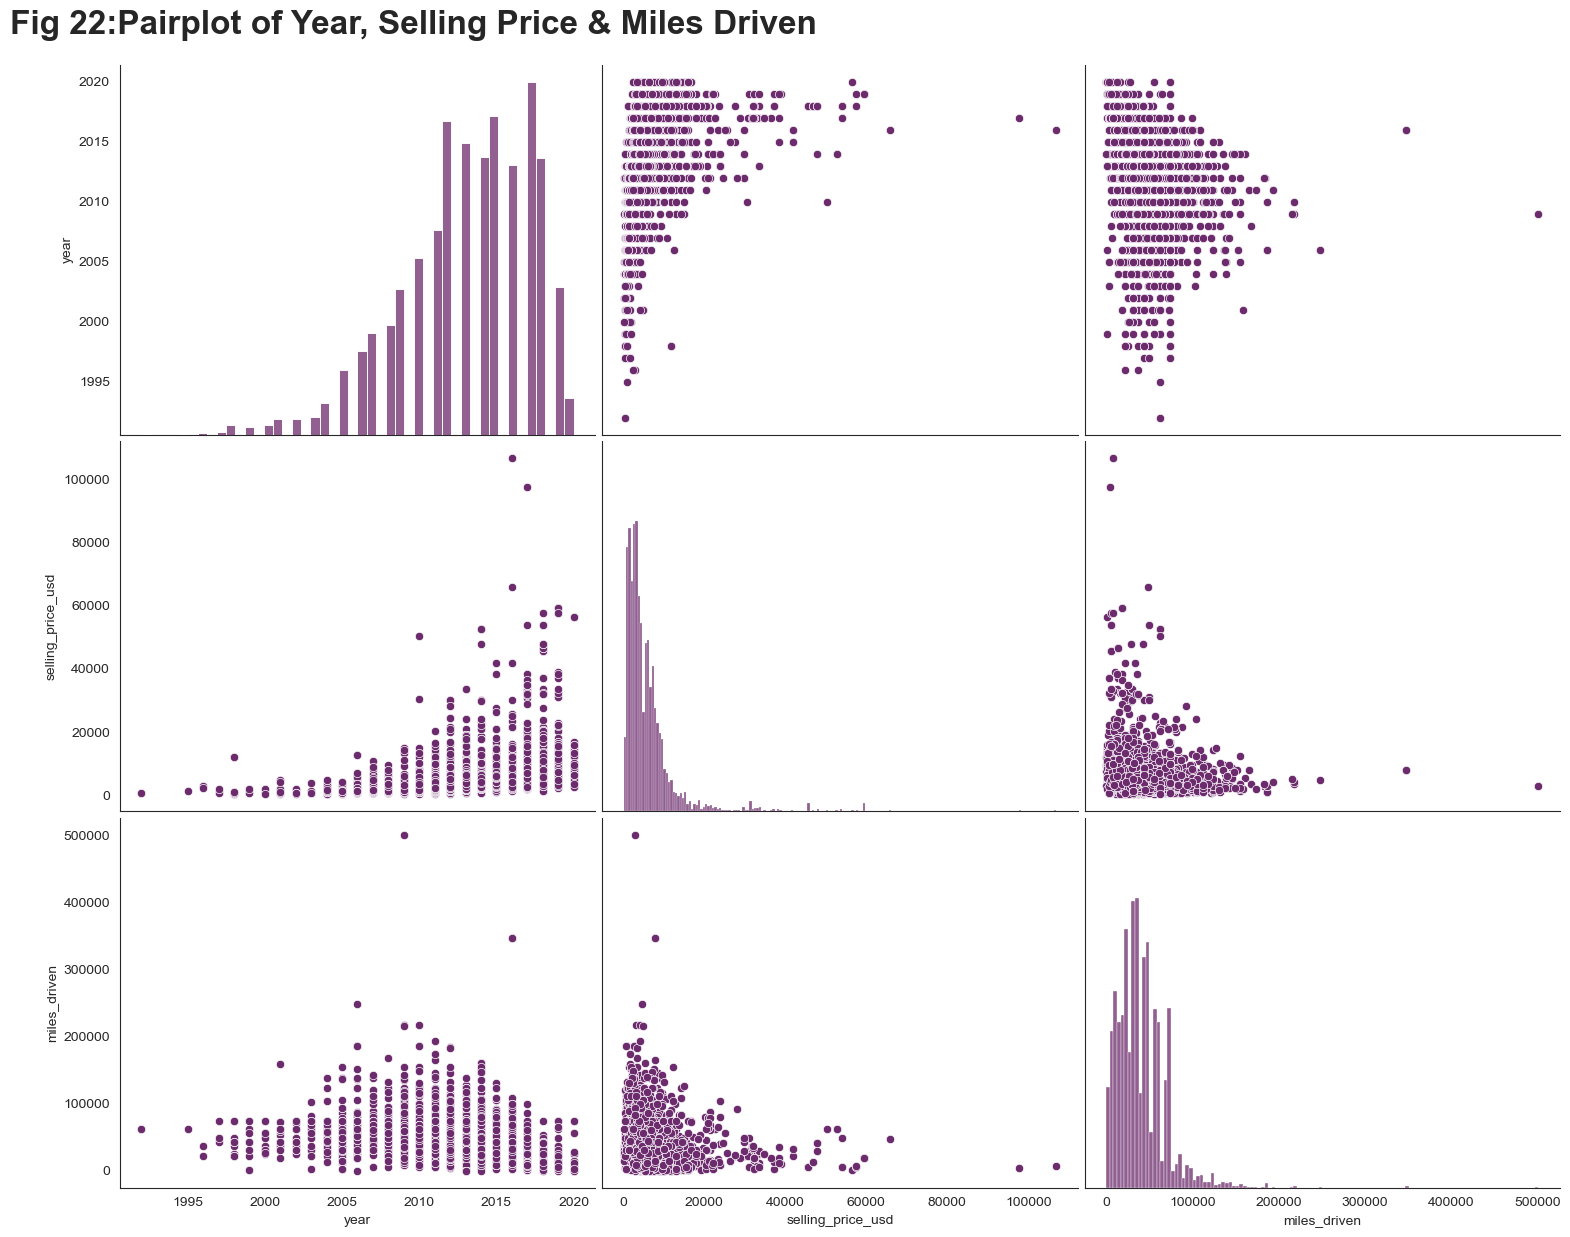

In [38]:
###################################################
### SECTION 03: Insights Section 01
### Step 32:  Pairplot of Year, Selling Price & Miles Driven
###################################################

# Set the style of seaborn plots to 'white'
sns.set_style("white")
 
# Select only the numerical columns for the pair plot. For example:
numerical_df = data2[['year','selling_price_usd', 'miles_driven']]
sns.set_palette("flare_r")  # Setting the color palette
# Adjusting plot size and aspect ratio in pairplot
pp = sns.pairplot(numerical_df, height=4, aspect=1.3)
pp.fig.suptitle('Fig 22:Pairplot of Year, Selling Price & Miles Driven', x=.25, y=1.03, fontsize=24, fontweight="bold")



##### Overview ###### 
The objective of this analysis is to explore and summarize the Car Details Dataset, sourced from Kaggle. The dataset contains information about various cars, including their name, year, selling price, kilometers driven, fuel type, seller type, transmission, and owner details. The **substantive question we aim to address is understanding the key numerical variables in the dataset and uncovering insights about the Indian car market**. 

##### Data and Model ###### 
We used the Car details dataset from Kaggle, and it was loaded into a Pandas DataFrame for manipulation and analysis. 
Our primary focus was on numeric variables, specifically the selling price and distance driven. To better align with the American audience, we converted these attributes to Selling Price in US Dollars and Miles Driven We incorporated categorical variables, namely Year, Fuel, Owner, and Transmission, into our data analysis to enhance our understanding and derive deeper insights. 
We leveraged libraries such a**s Matplotlib, SciPy, Plotly, Seaborn, and mpl_toolki**ts to craft informative visualizations.
.

##### Results ######
# At the end of a data analysis, several key conclusions can be drawn based on the obtained results:
1. Miles Driven:
- The Miles Driven attribute is a positive skew with a value: 2.67, It is a unimodal and hence as visible in **Fig 2**. The right tail is longer, leaning to the left.
- As seen in **Fig 1**,The mean miles driven is higher than the median, indicating a **right-skewed distribution**. This suggests that while most of the cars have been driven a moderate number of miles, there are a few cars with exceptionally high mileage skewing the average upwards. 2. *  - -A high **standard deviation** relative to the mean suggests significant variability in how much cars have been driven.    - The **range** between the minimum and maximum miles driven is extremely wide, from less than a mile to over half a million miles, highlighting the diverse usage of the vehicles in the dataset.
- The significant range in miles driven from virtually new cars to those with over half a million miles indicates that the dataset includes a wide variety of car types, from nearly new to heavily used vehicles. This diversity suggests the dataset might cover multiple vehicle markets, from nearly new car sales to older vehicles
- As seen in **Fig 21**, for Vehicles sold with 50,000 miles or less on the odometer, there appears to be a positive correlation betweem miles driven and how many previous owners (e.g., a vehicle sold by the second owner tends to have more miles than a vehicle sold by the first owner). However this correlation seems to dissipate for vehicles with greater than 50,000 miles. It doesnt seem like there is a strong positive correlation between how many owners and how many miles driven (see step 31)

2. Selling Price:
- As seen in **Fig 4**, the Selling attribute is a positive skew with a value: 4.89, It is a unimodal and hence as visible in the viz. The right tail is longer, leaning to the left.
- Similar to `miles_driven`, the **mean selling price** is also higher than the median, indicating a right-skewed distribution, as shown in **Fig 3**. This implies a few very expensive cars are pushing the average price up, while most cars are priced more modestly.
- The **mode** of the selling price is even lower than the median, which reinforces the presence of a peak at a lower price range where most cars are concentrated.
- The **standard deviation** is high, almost reaching the mean value, indicating that the selling prices vary widely across the dataset.
- **Range and Variance**:
- A substantial range from 240 dollars to 106,800 dollars indicates an extensive spread between the cheapest and the most expensive cars.
- The **variance** is significant, pointing to a broad spread of prices within the dataset.                                                 -
- The right-skewed distribution of both miles_driven and selling_price_usd suggests that while most cars are affordable and moderately used, there's a small but significant segment of the market that deals with luxury or high-value cars. The presence of these high-value outliers can influence average prices.

3. Brand Popularity:
- Clearly visible in **Fig 5**,Maruti is the best-selling car brand in the dataset. It's total sales of 1280 units is an indication of popularity and high demand for that car model.
- As indicated in **Fig 6**, car brands with higher prices, exceeding 100,000 dollars, sold fewer units, while those with prices below $20,000 sold more units. This may indicate that lower-priced cars are more accessible and therefore more in demand by consumers, whereas high-end cars have a more limited market due to their high prices
- There are many high value car models which do not make the top 10 category, However they represent an outsized portion of total dollars sold. Moreover, of the low volume, high value category of **all others** by make (where count of vehicles sold by make is not in the top 10), the majority of these vehicles use diesel fuel and have automatic transmissions representing the majority of deisel vehicles within the entire dataset. This insight can be gained through the Tree Map charts as seen in **Fig 9**. 

4. Yearly Sales Trends:
- As seen in **Fig 19**, the year 2017 being the one with the highest sales at 466 could signify a peak in demand or popularity for cars during that period.It could be due to factors such as attractive models, special promotions, or a favorable economy.







##### Conclusion ###### 

The analysis of the Car Details Dataset yielded several key insights. Firstly, the dataset exhibits significant variability in both mileage and selling prices, with a wide range of values observed for both attributes. Maruti emerges as the dominant car brand in terms of sales volume, indicating its popularity among consumers. Additionally, the year 2017 stands out as a period of heightened sales activity, suggesting potential market trends or external influences during that time. Furthermore, the presence of high-value outliers in both mileage and selling prices underscores the diversity of the car market, with niche segments catering to luxury or high-value vehicles. Overall, the analysis highlights the nuanced dynamics within the car market, providing valuable insights for stakeholders and decision-makers.